In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the training and testing csv datasets

In [5]:
train_df = pd.read_csv('train.csv') #full unaltered training data
test_df  = pd.read_csv('test.csv') #full unaltered test data

Seeing the Dimensionality of the data

In [6]:
train_df.shape

(44553, 27)

Seeing the features


In [7]:
train_df.columns

Index(['patient_id', 'sex', 'age_group', 'height_cm', 'weight_kg',
       'waist_circumference_cm', 'vision_left', 'vision_right', 'hearing_left',
       'hearing_right', 'bp_systolic', 'bp_diastolic', 'fasting_glucose',
       'total_cholesterol', 'triglycerides', 'hdl_cholesterol',
       'ldl_cholesterol', 'hemoglobin_level', 'urine_protein_level',
       'serum_creatinine', 'ast_enzyme_level', 'alt_enzyme_level',
       'ggt_enzyme_level', 'oral_health_status', 'dental_cavity_status',
       'tartar_presence', 'has_copd_risk'],
      dtype='object')

Checking what are the data types of each feature


In [8]:
train_df.dtypes

,0
patient_id,int64
sex,object
age_group,int64
height_cm,int64
weight_kg,int64
waist_circumference_cm,float64
vision_left,float64
vision_right,float64
hearing_left,float64
hearing_right,float64


Check for duplicates

In [9]:
duplicates = train_df.duplicated().sum()
duplicates

np.int64(0)

## Checking if there are any nan values


In [10]:
train_df.isna().sum()

,0
patient_id,0
sex,0
age_group,0
height_cm,0
weight_kg,0
waist_circumference_cm,0
vision_left,0
vision_right,0
hearing_left,0
hearing_right,0


## Data Pre-processing

In [11]:
train_df['oral_health_status'] = train_df['oral_health_status'].map({'Y': 1, 'N': 0})
test_df['oral_health_status'] = test_df['oral_health_status'].map({'Y': 1, 'N': 0})
train_df['tartar_presence'] = train_df['tartar_presence'].map({'Y': 1, 'N': 0})
test_df['tartar_presence'] = test_df['tartar_presence'].map({'Y': 1, 'N': 0})
train_df['sex'] = train_df['sex'].map({'F': 1, 'M': 0})
test_df['sex'] = test_df['sex'].map({'F': 1, 'M': 0})

Just a check if the data type changed or not


In [12]:
train_df.dtypes

,0
patient_id,int64
sex,int64
age_group,int64
height_cm,int64
weight_kg,int64
waist_circumference_cm,float64
vision_left,float64
vision_right,float64
hearing_left,float64
hearing_right,float64


Just checking if the conversion was done right or not


In [13]:
train_df.isnull().sum()

,0
patient_id,0
sex,0
age_group,0
height_cm,0
weight_kg,0
waist_circumference_cm,0
vision_left,0
vision_right,0
hearing_left,0
hearing_right,0


Check for duplicates again

In [14]:
duplicates = train_df.duplicated().sum()
duplicates

np.int64(0)

## EDA

### Plotting a heatmap to check the correlation between the features


In [15]:
corr = train_df.corr()
corra = train_df.corr()['has_copd_risk'].sort_values(ascending=False)
print(corra)

has_copd_risk             1.000000
hemoglobin_level          0.402280
height_cm                 0.394175
weight_kg                 0.301453
triglycerides             0.253442
ggt_enzyme_level          0.239765
serum_creatinine          0.225580
waist_circumference_cm    0.224711
bp_diastolic              0.108448
dental_cavity_status      0.104297
fasting_glucose           0.097504
tartar_presence           0.096917
alt_enzyme_level          0.092264
bp_systolic               0.072169
vision_right              0.065009
vision_left               0.059228
ast_enzyme_level          0.058897
urine_protein_level       0.014028
patient_id                0.012876
hearing_right            -0.021527
hearing_left             -0.024632
total_cholesterol        -0.027961
ldl_cholesterol          -0.044931
age_group                -0.163253
hdl_cholesterol          -0.177540
sex                      -0.510569
oral_health_status             NaN
Name: has_copd_risk, dtype: float64


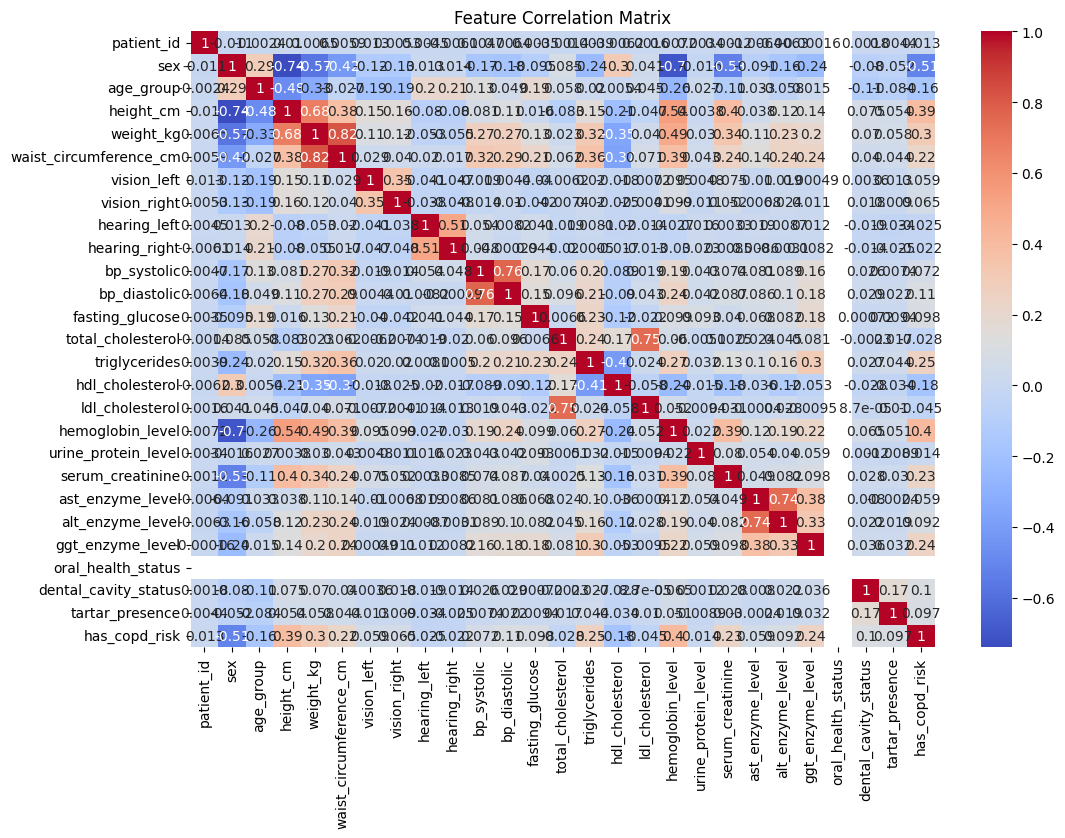

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

from preprocessing we found oral health status is same for all rows in training data. So we can remove it

In [17]:
X_train = train_df.drop(['patient_id','oral_health_status', 'has_copd_risk'], axis=1)
Y_train = train_df['has_copd_risk']
X_test = test_df.drop(['patient_id','oral_health_status'], axis=1)

After doing basic cleaning, in the commented section below, we also tried improving accuracy by some more dropping based on the correlation with target class.


In [18]:
# # Calculate correlation with target
# correlations = train_df.corr()['has_copd_risk'].abs()

# # Choose a threshold (0.05, 0.07, 0.1 etc.)
# threshold = 0.05

# # Select features above threshold (excluding the target)
# selected_features = correlations[correlations >= threshold].index.tolist()
# selected_features.remove('has_copd_risk')

# print("Selected features:", selected_features)

# # Create filtered dataframe
# X_train = train_df[selected_features]
# X_test = test_df[selected_features]


Commented out as it didnt work out very well

We also tried removing outliers as taught in the tutorial

In [19]:
class outlierremoval:
	def __init__(self, col):
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		inter_quartile_range=q3-q1
		self.upper_whisker=q3+inter_quartile_range*1.5
		self.lower_whisker=q1-inter_quartile_range*1.5

	def remove(self, row):
		if(row<=self.upper_whisker and row>=self.lower_whisker):
			return row
		elif row < self.lower_whisker:
			return self.lower_whisker
		else:
			return self.upper_whisker

Before outlier removal

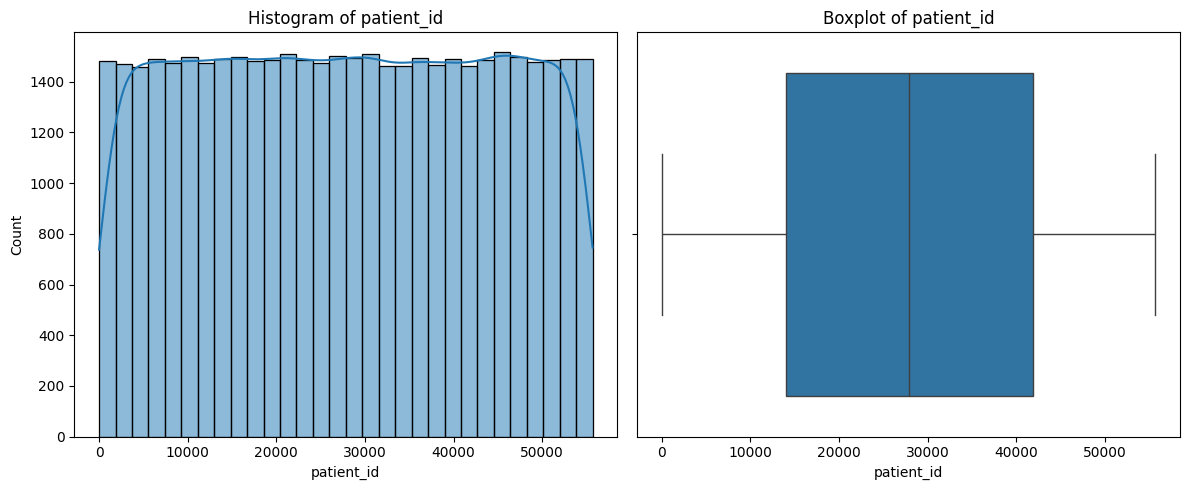

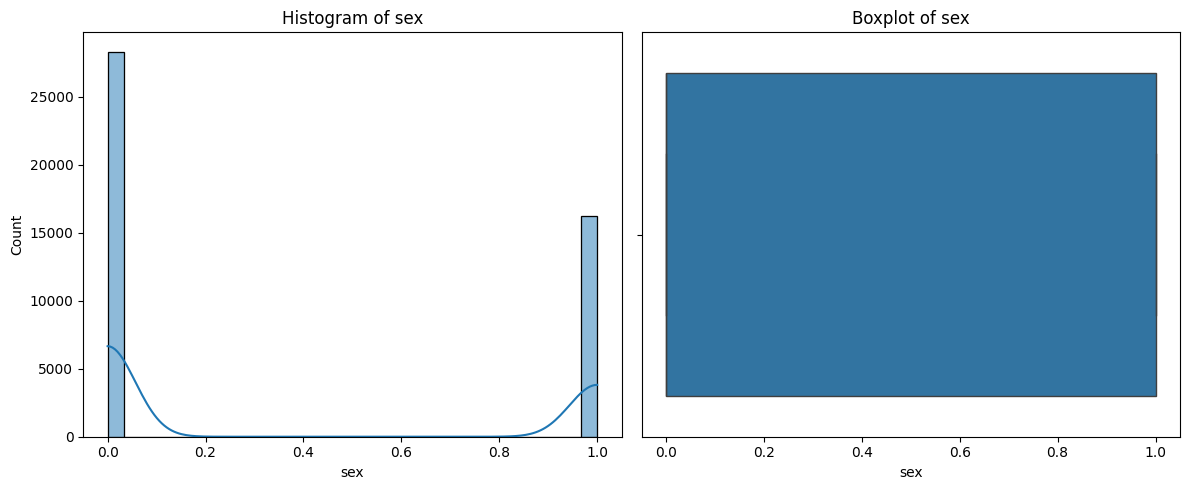

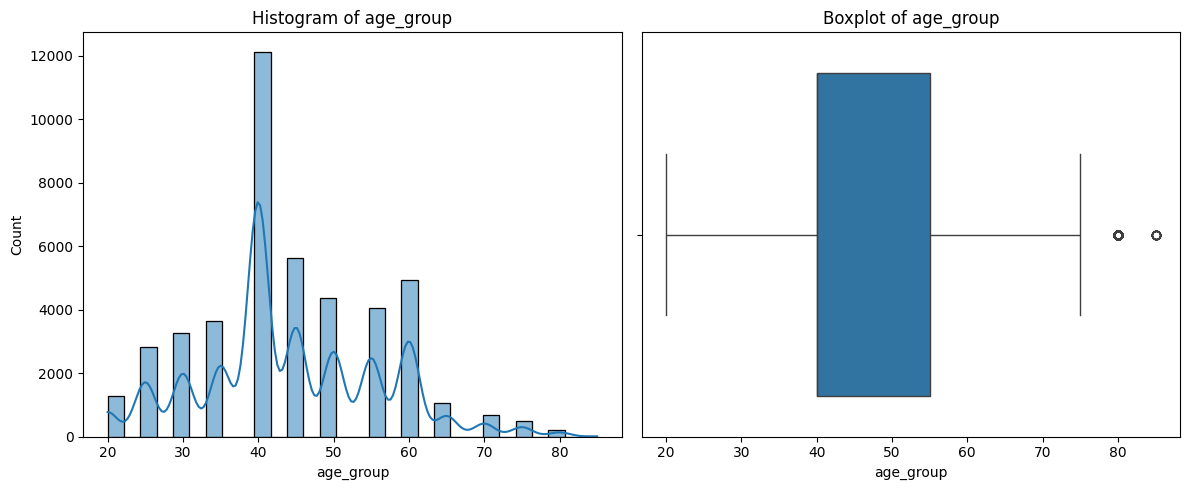

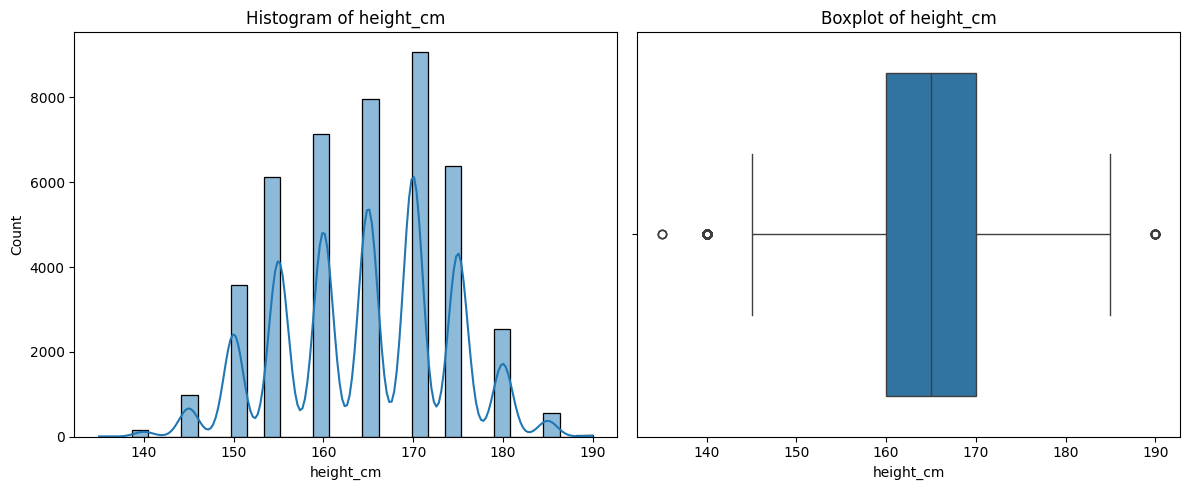

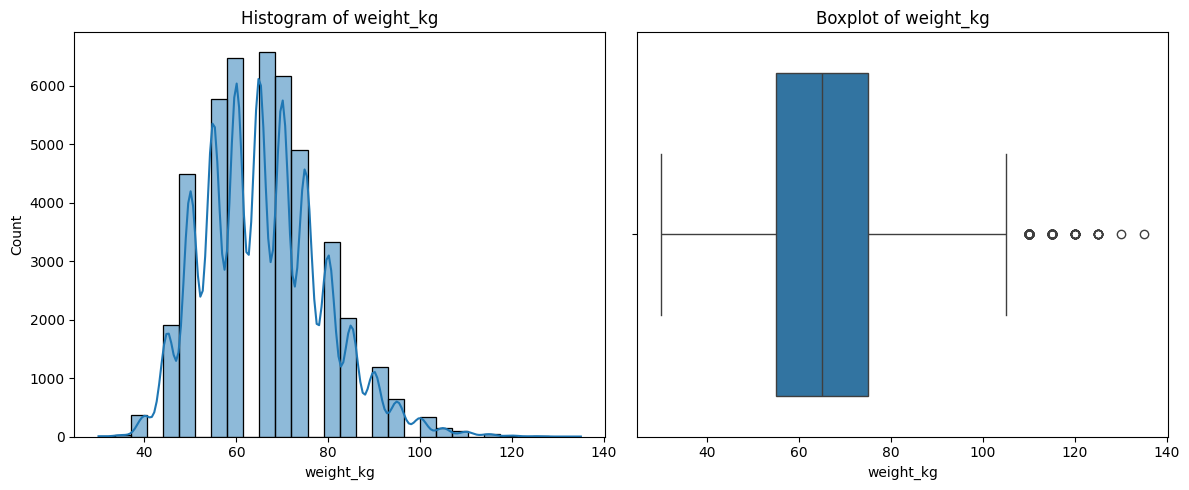

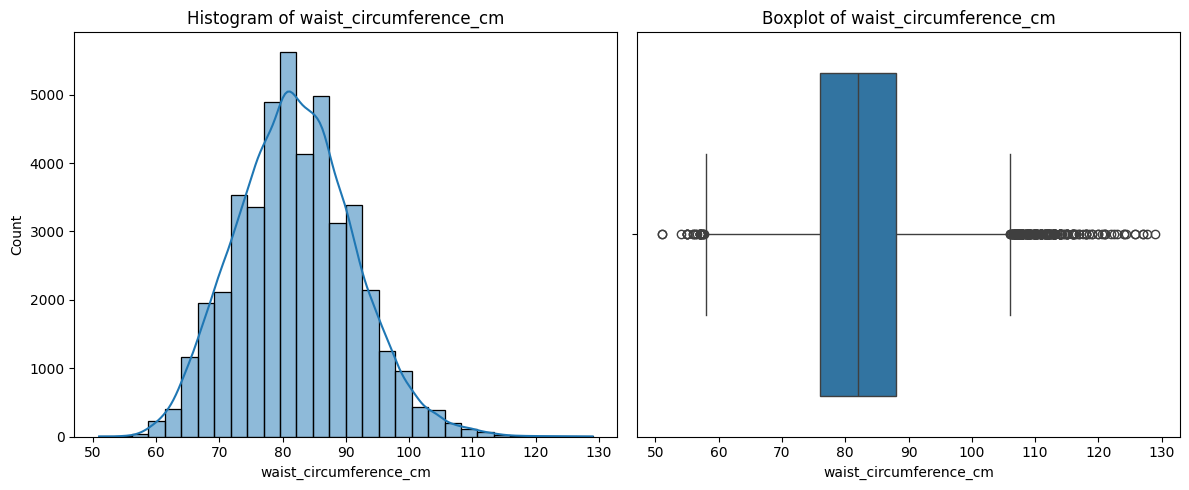

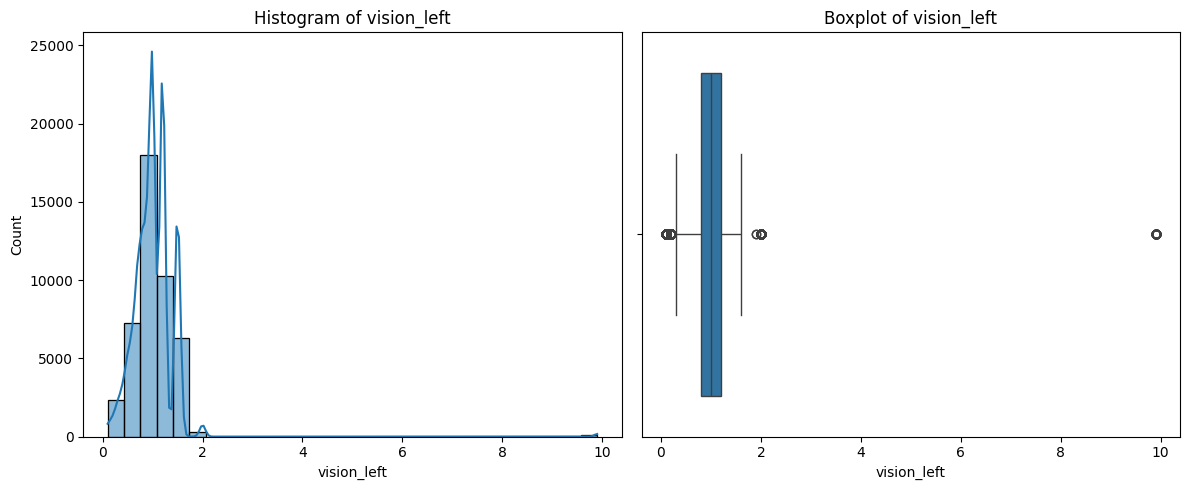

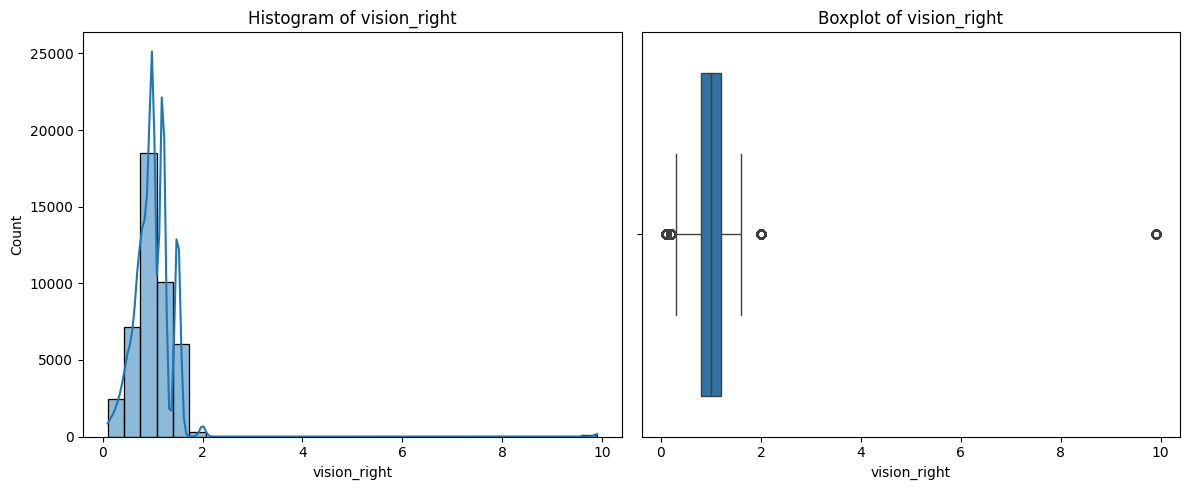

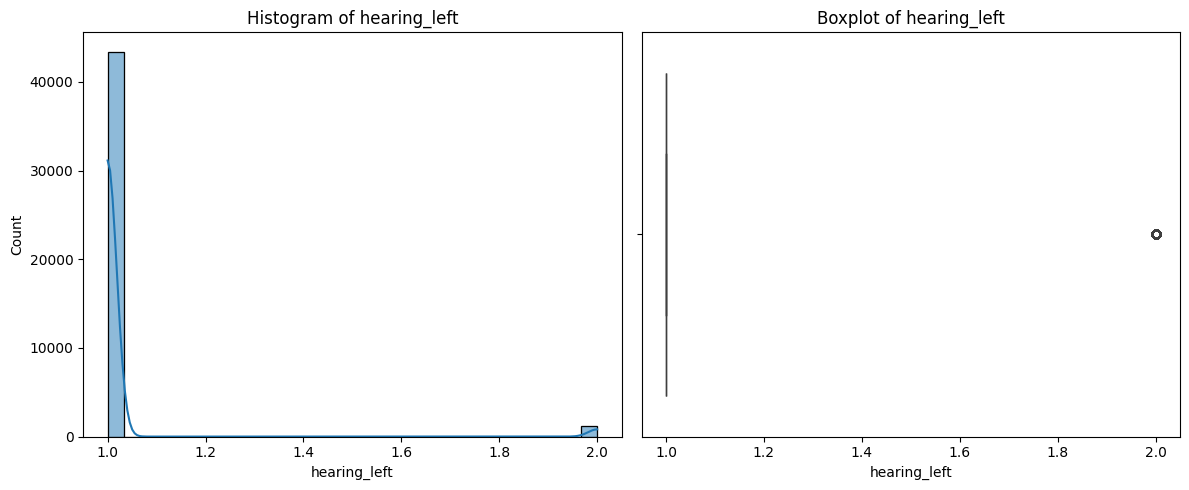

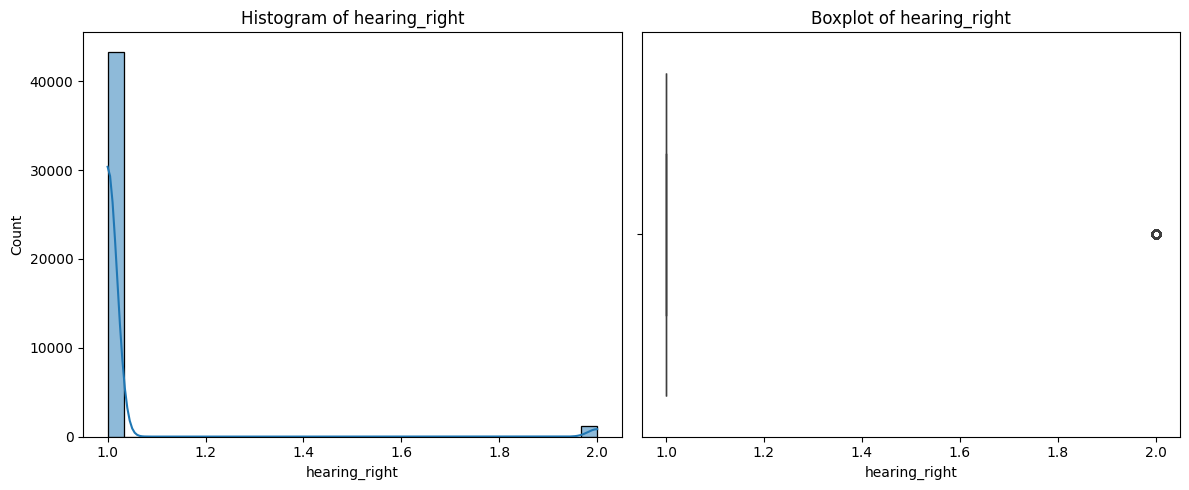

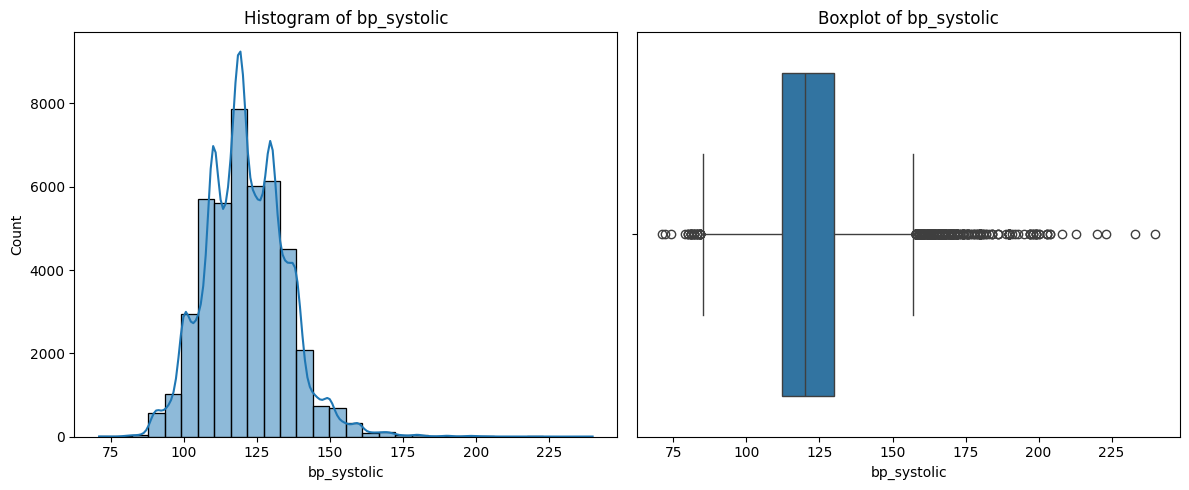

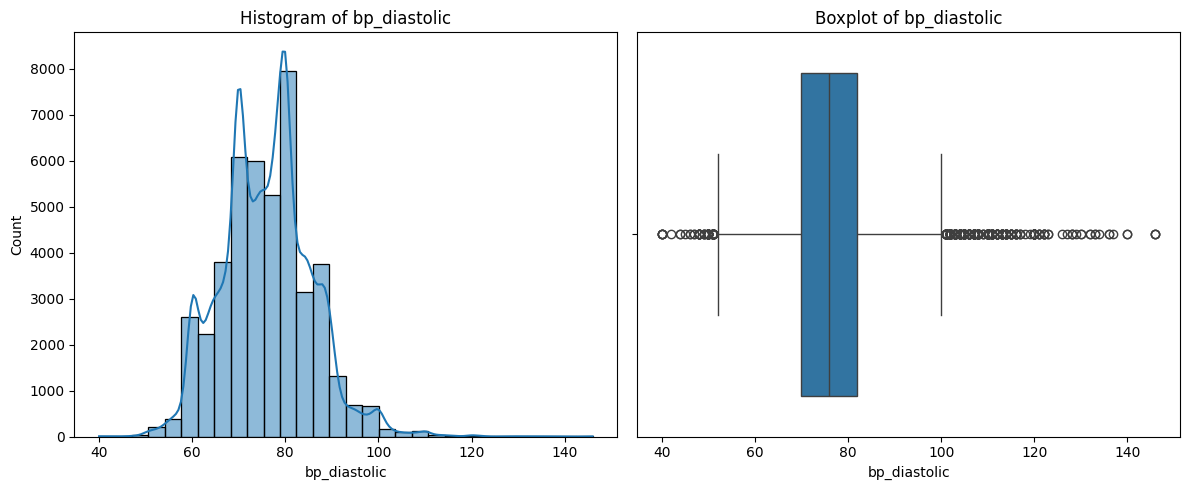

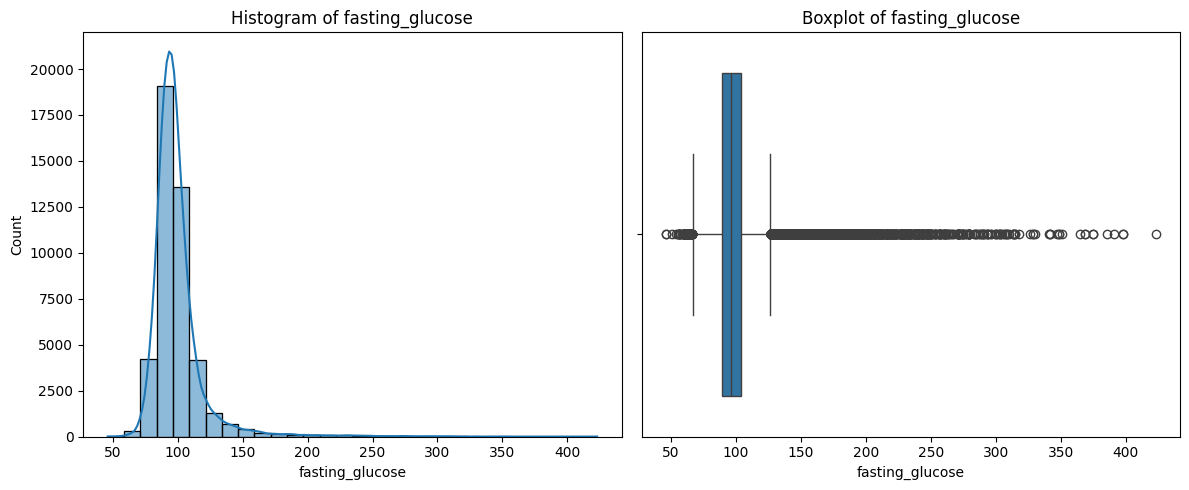

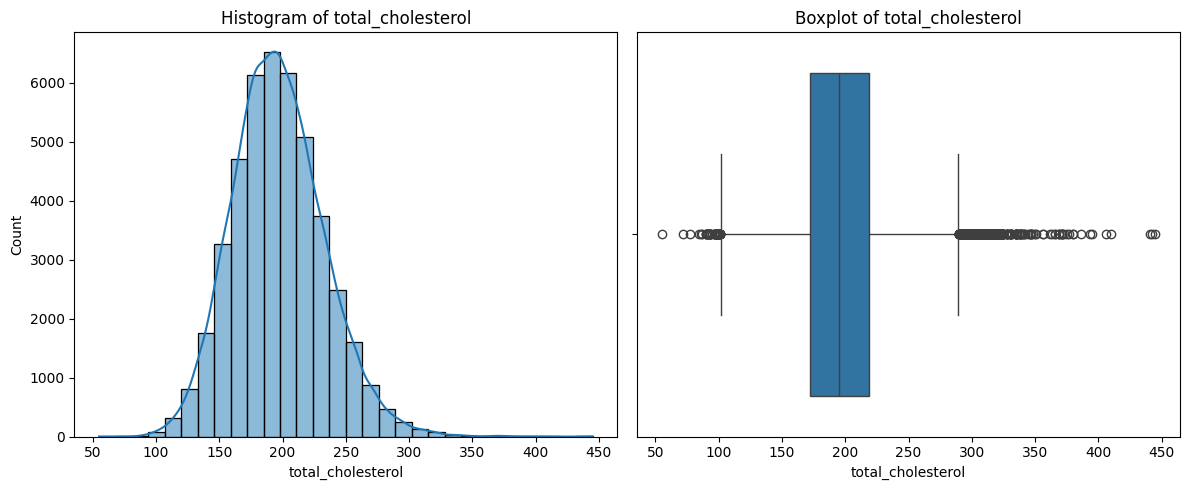

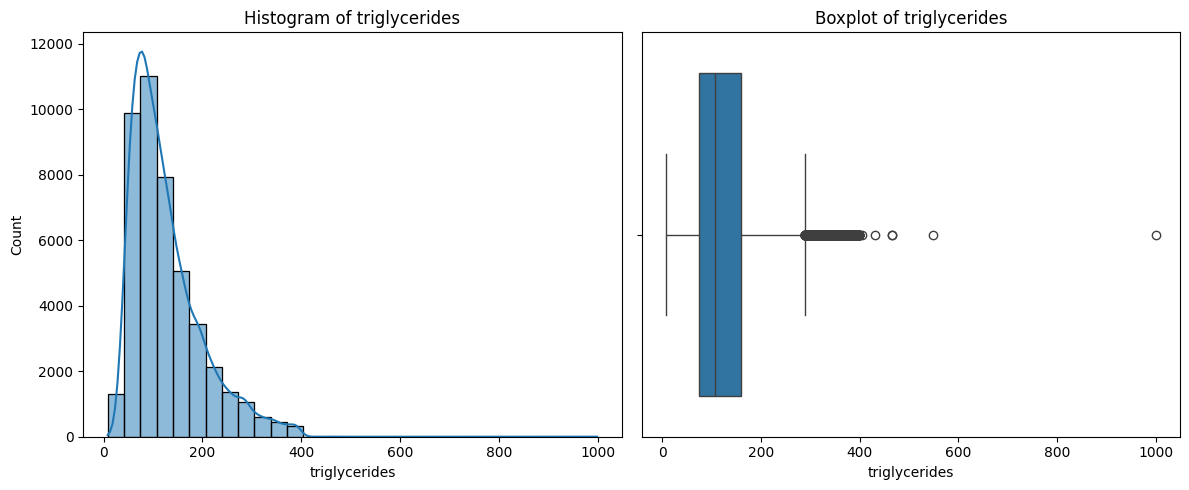

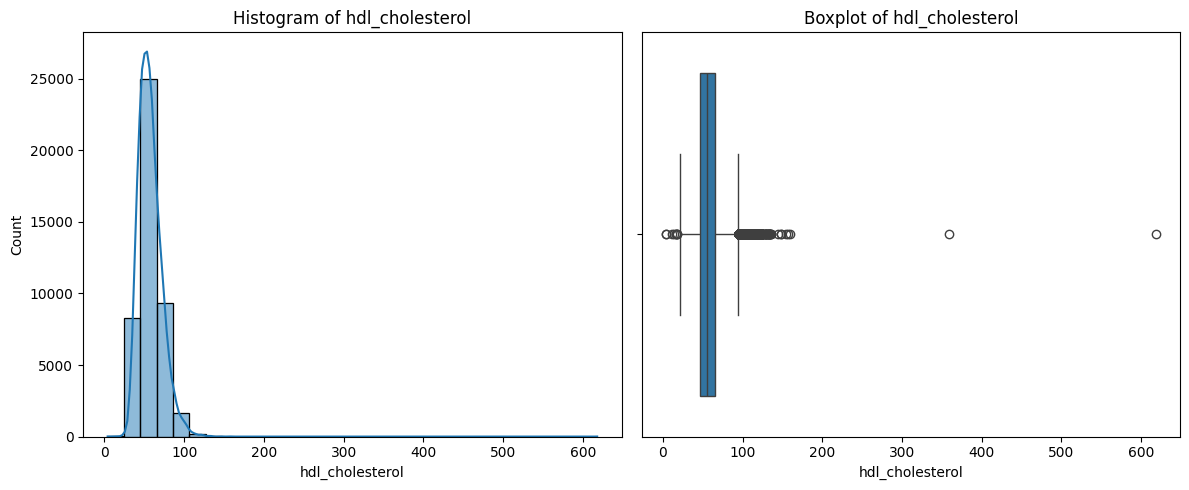

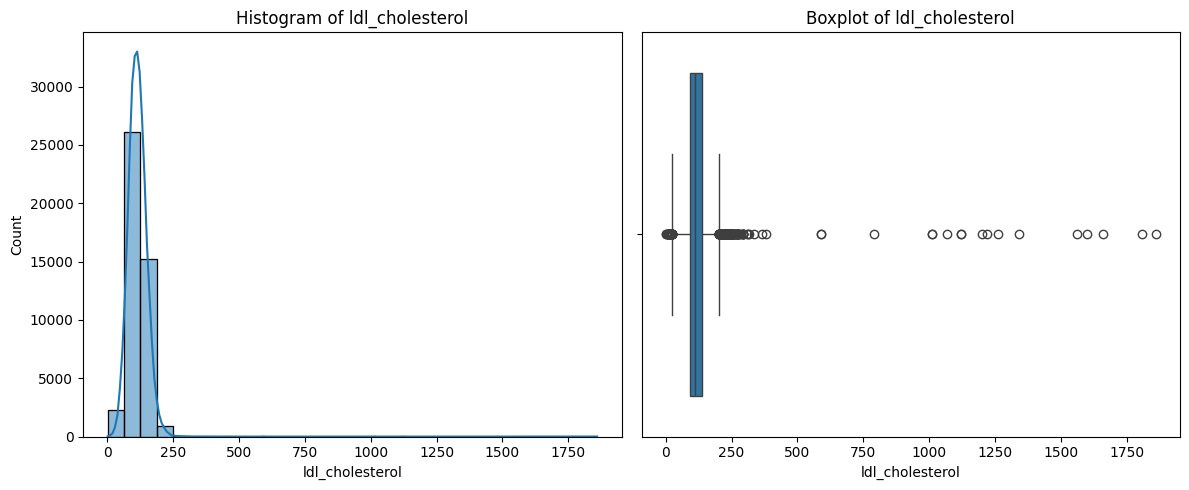

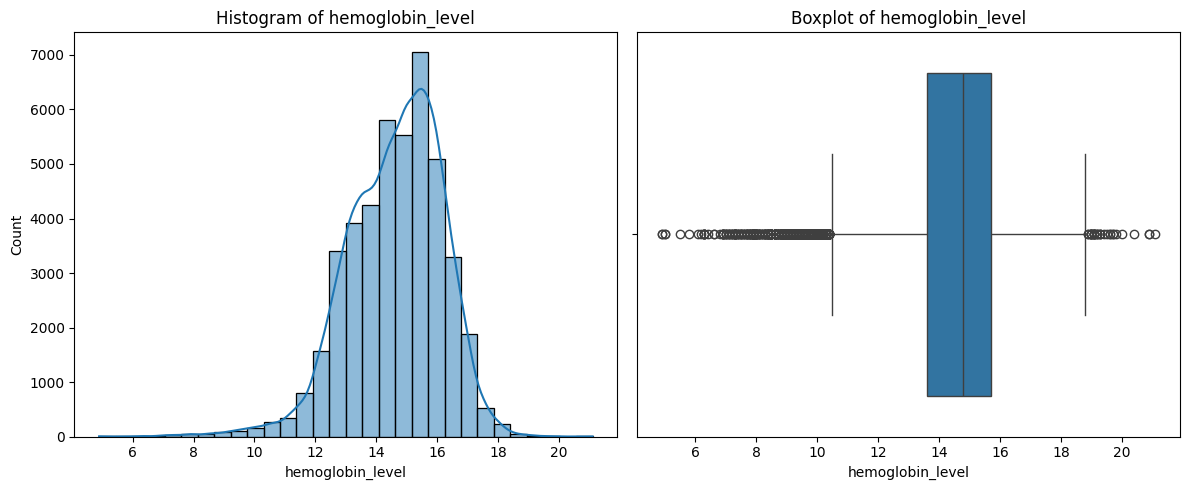

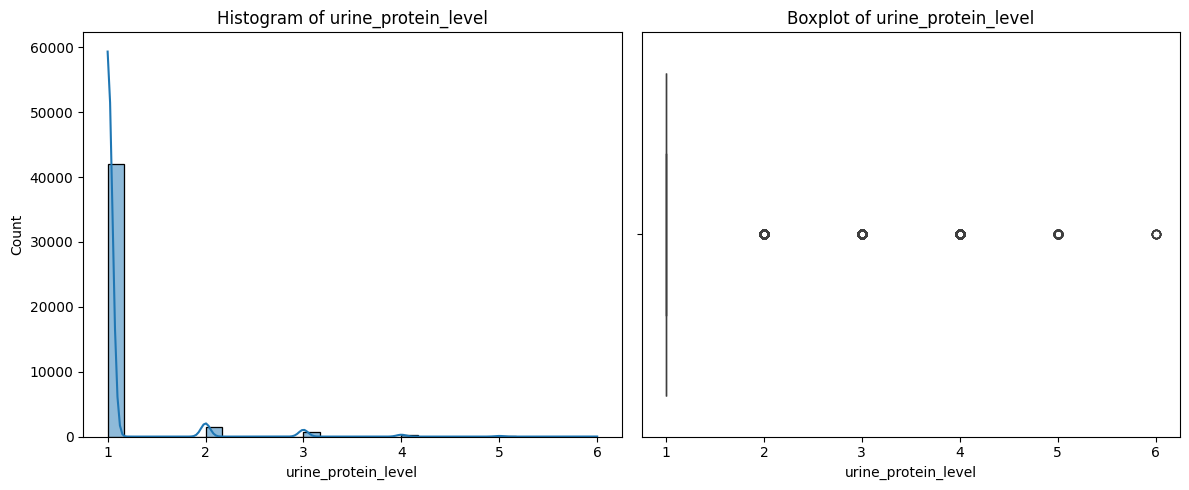

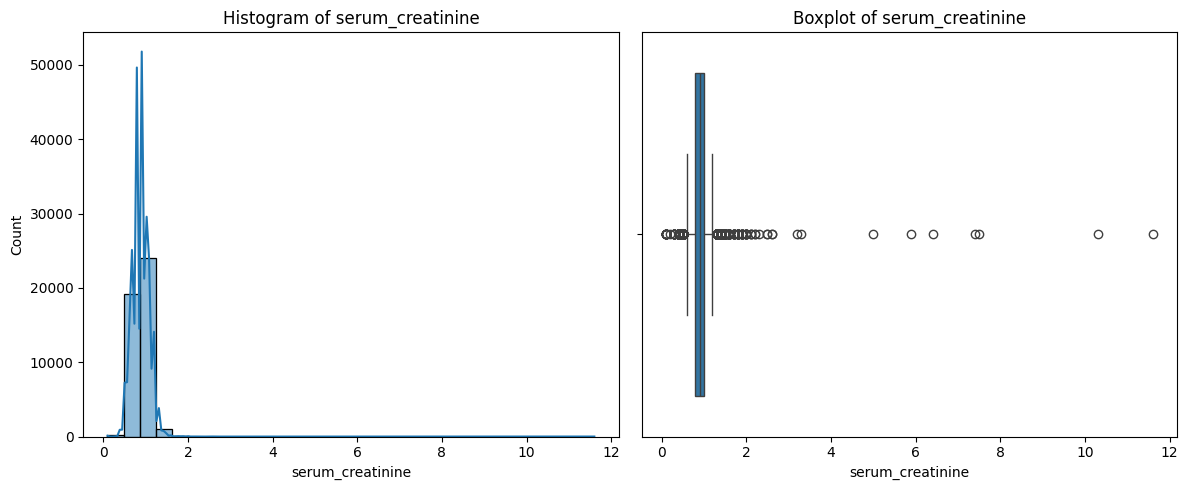

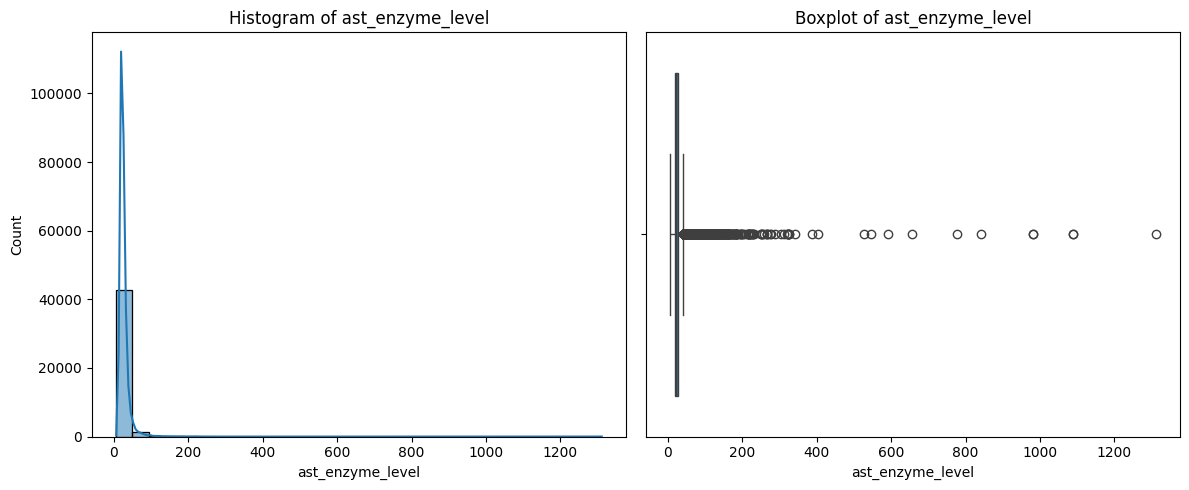

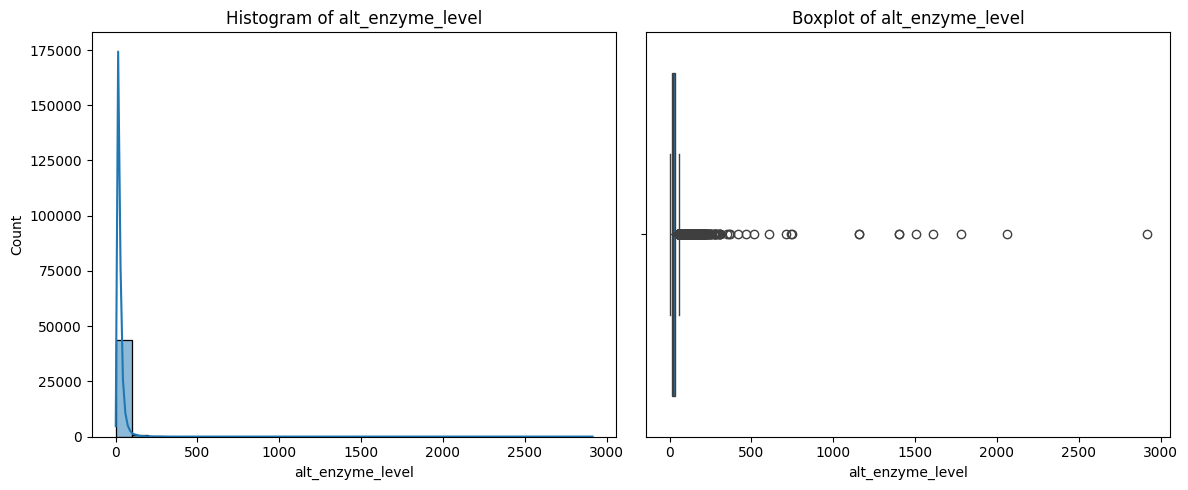

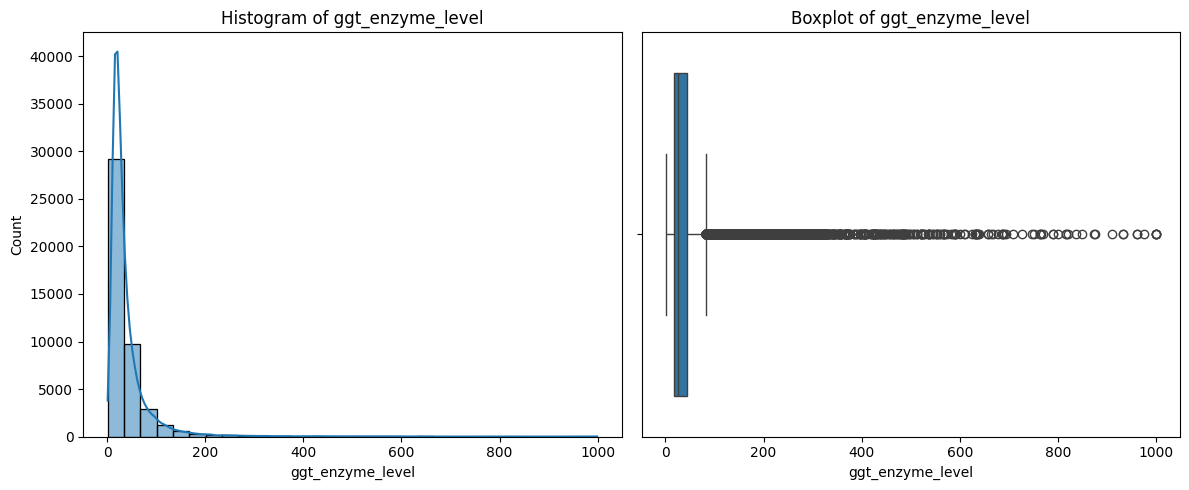

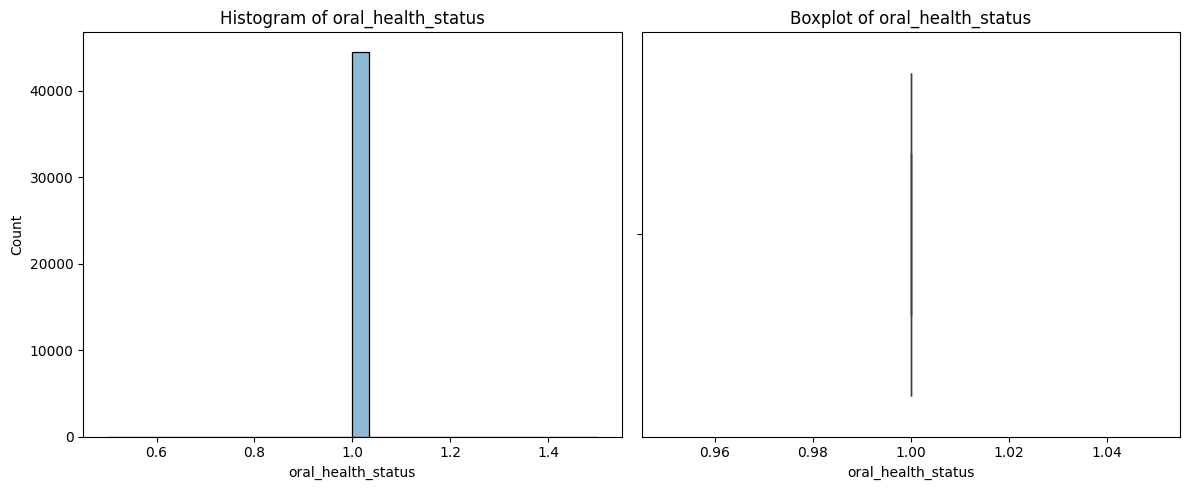

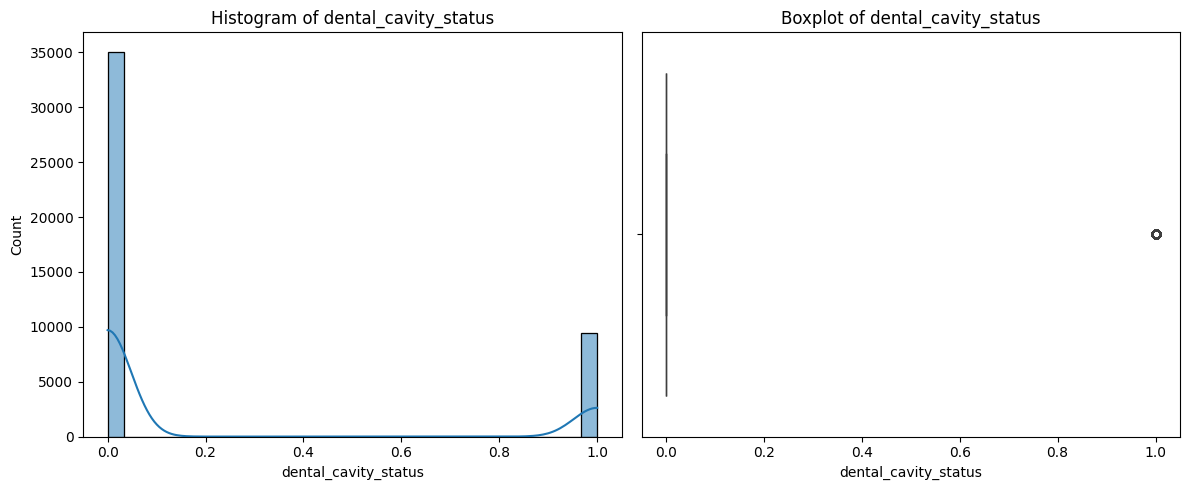

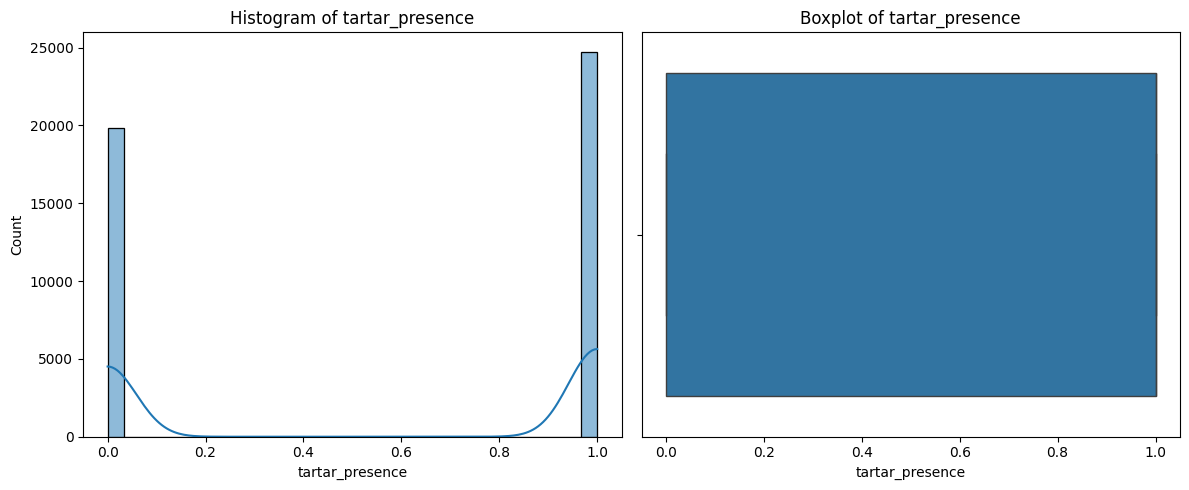

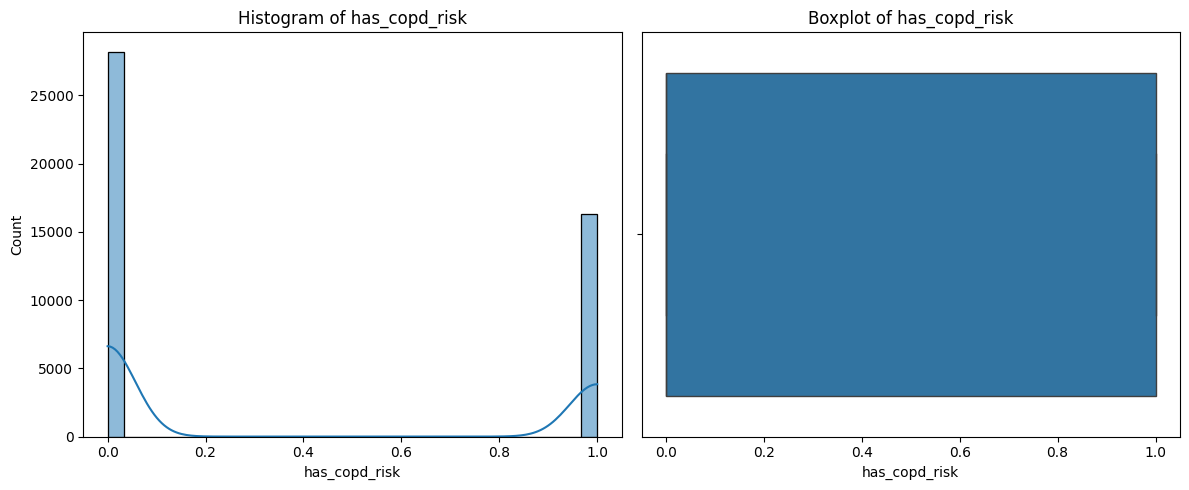

In [20]:
import seaborn as sns
numerical_features = train_df.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[feature])
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

In [21]:
# Apply your outlierremoval class to every numeric column
numeric_cols = train_df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop("has_copd_risk")

for col in numeric_cols:
    remover = outlierremoval(train_df[col])
    train_df[col] = train_df[col].apply(remover.remove)
    test_df[col] = test_df[col].apply(remover.remove)

Check outliers again

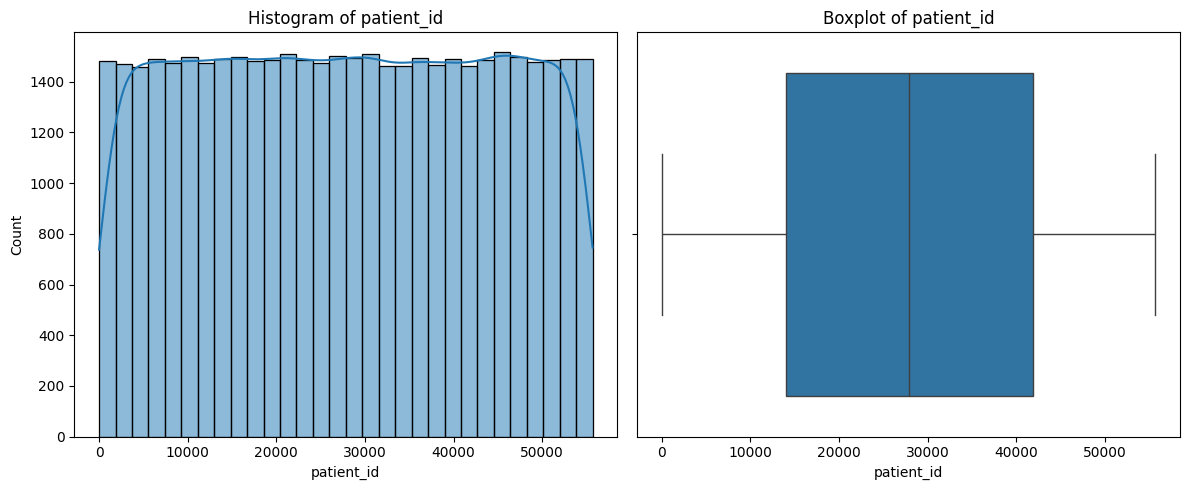

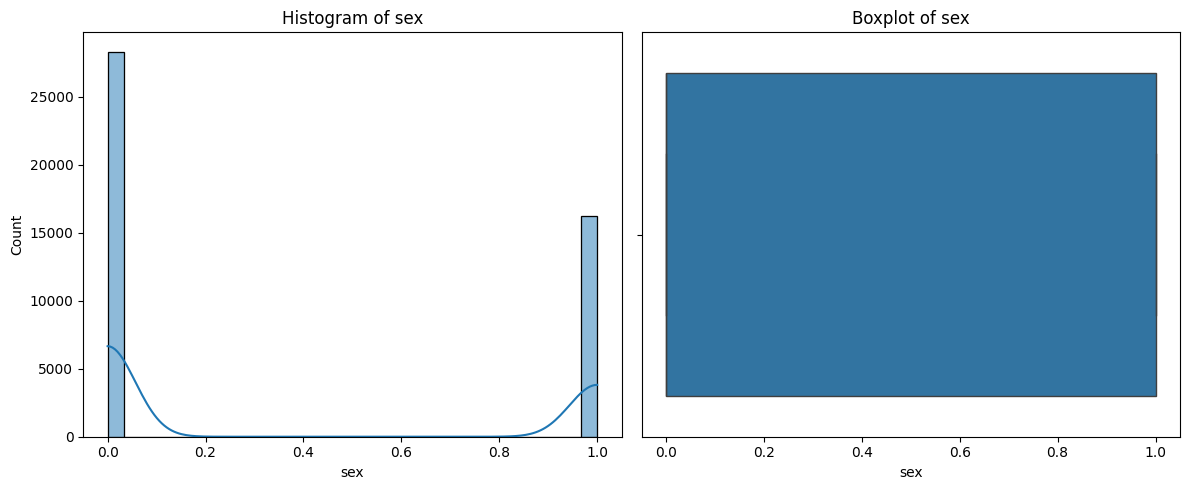

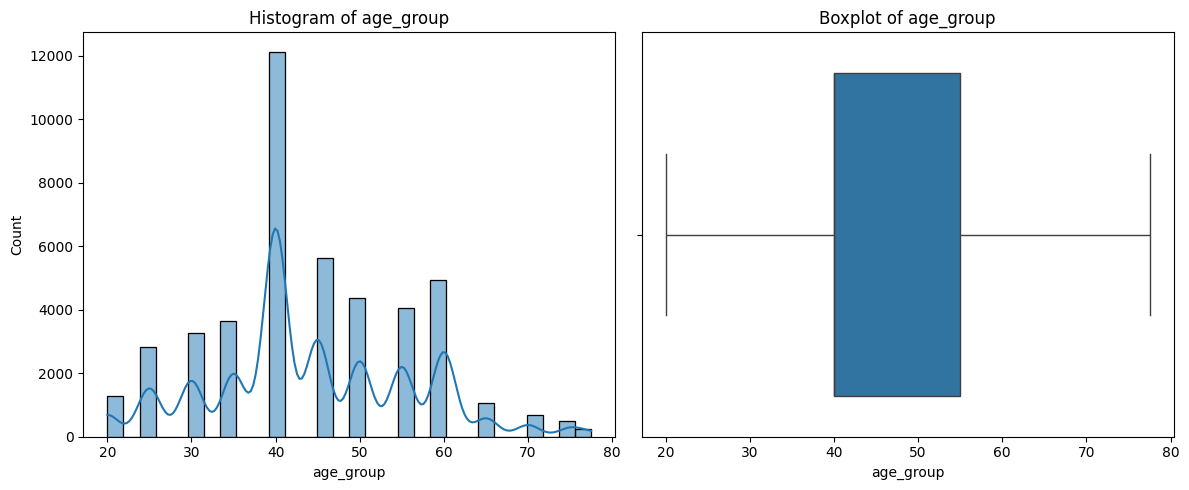

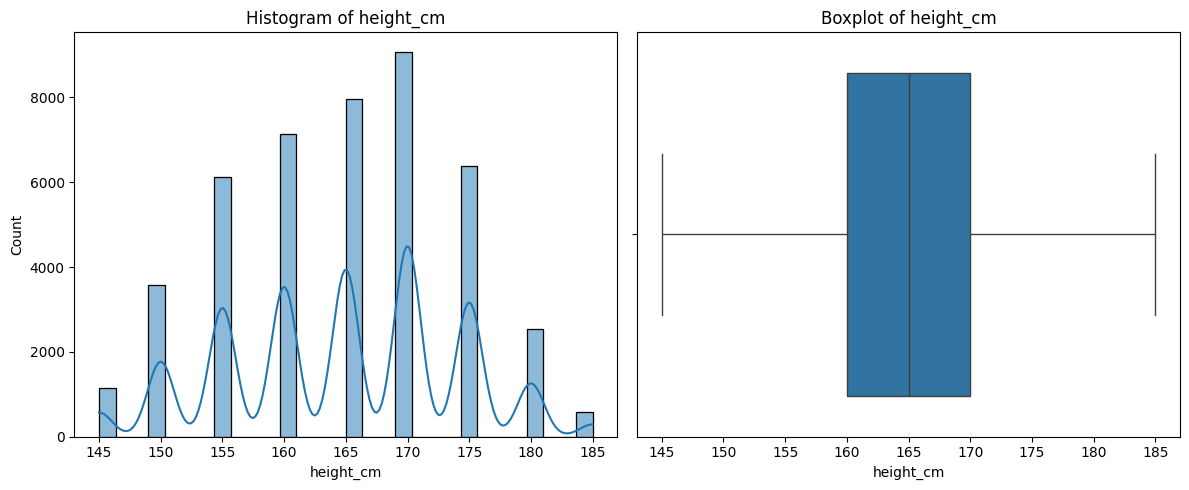

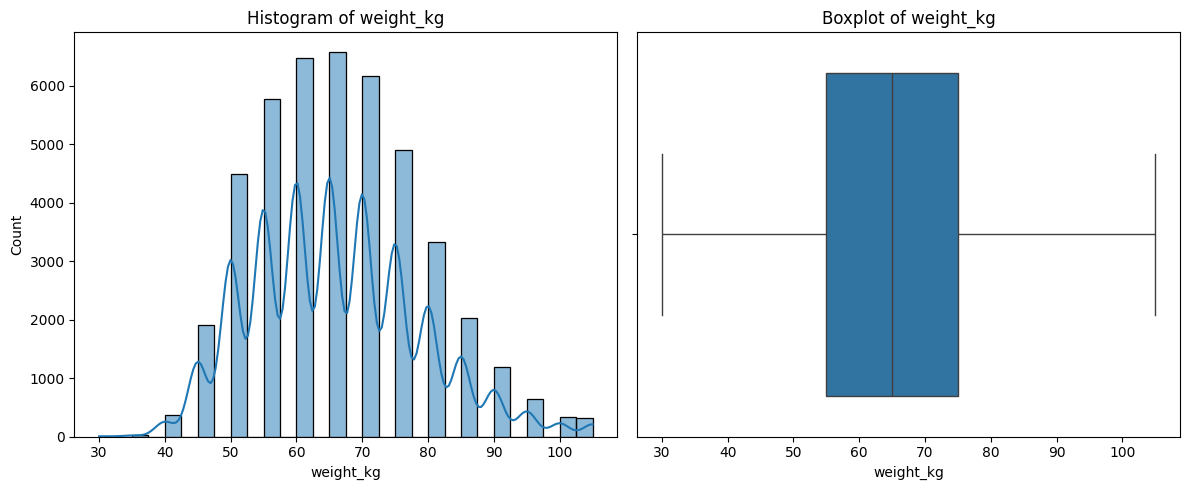

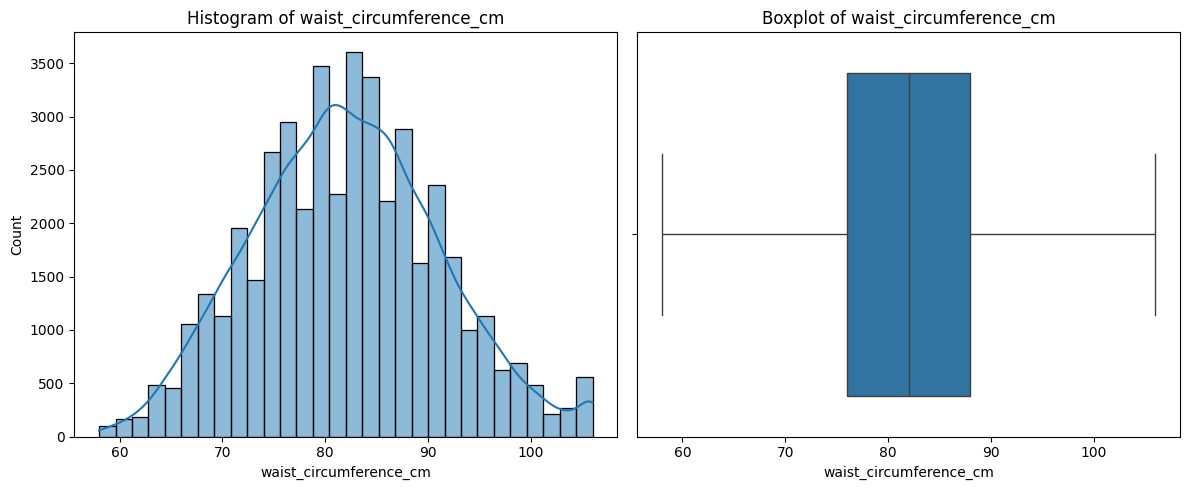

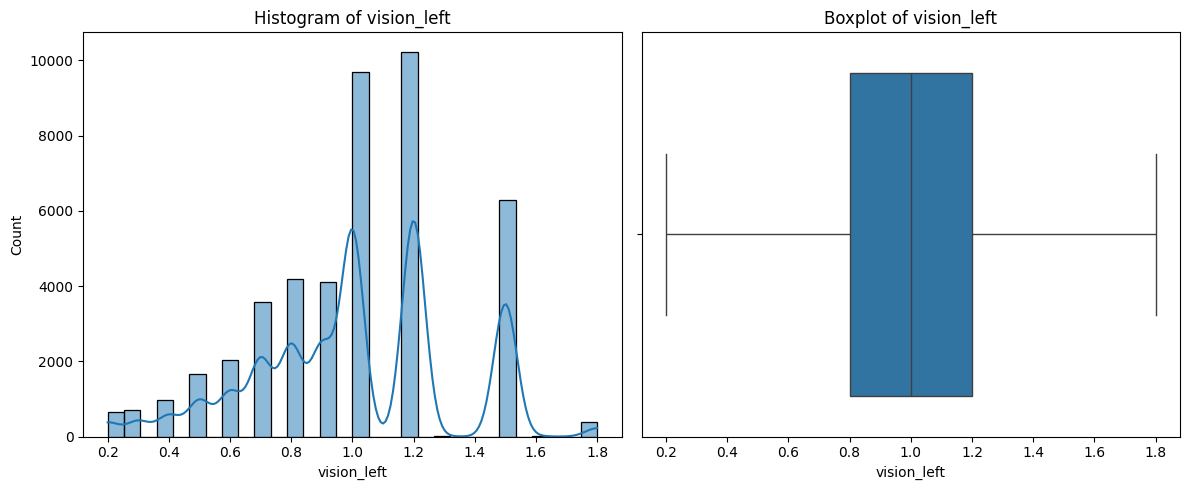

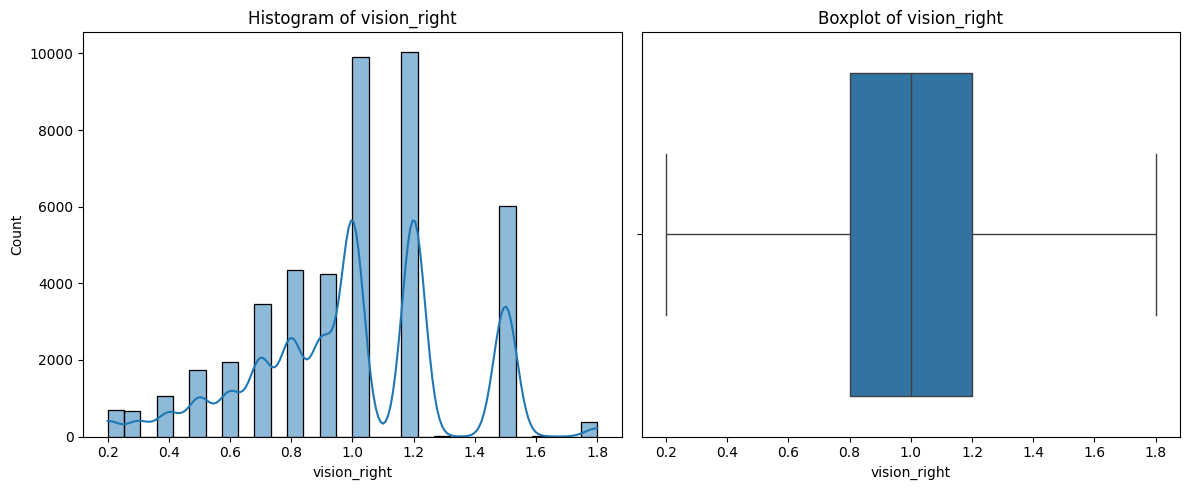

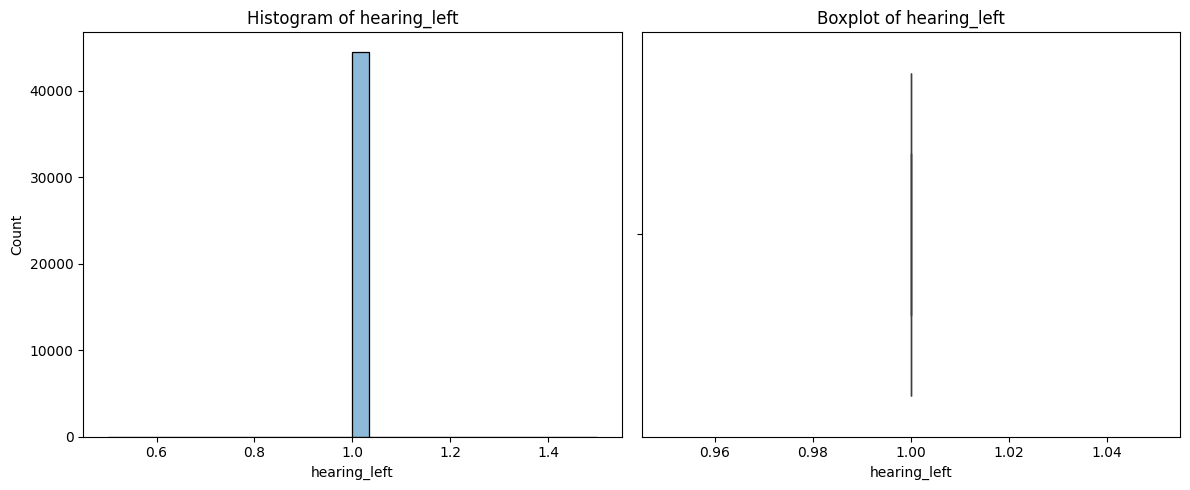

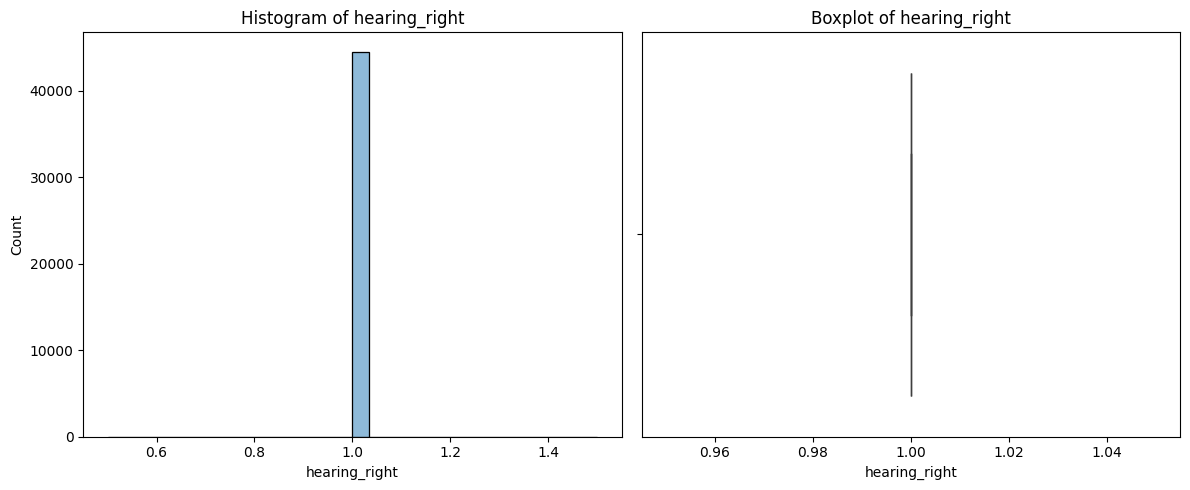

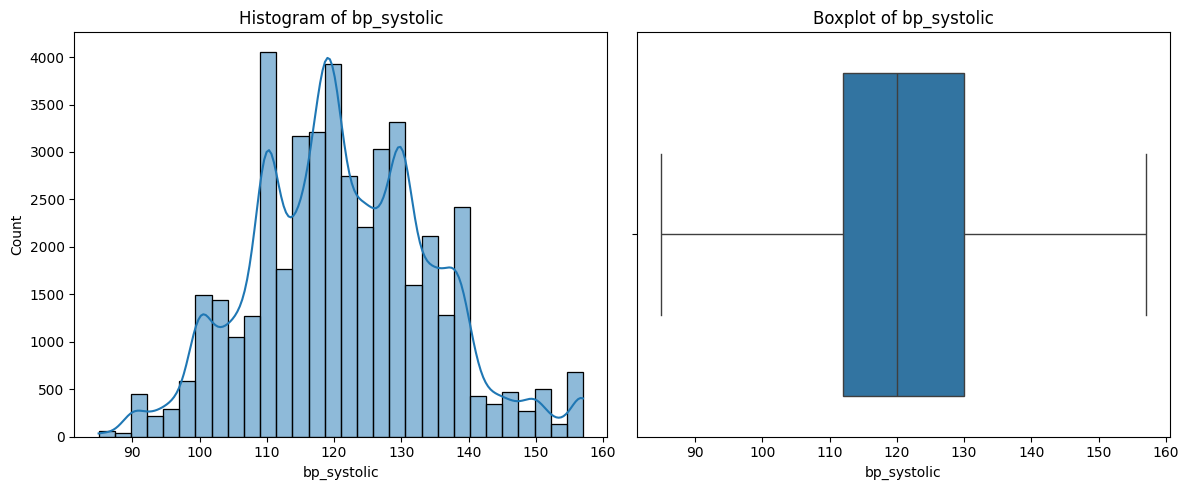

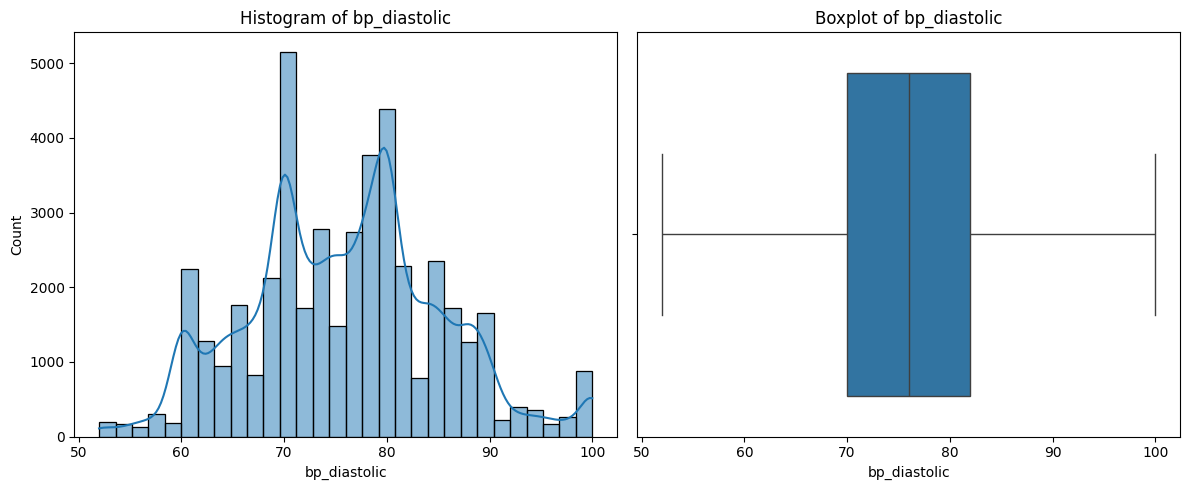

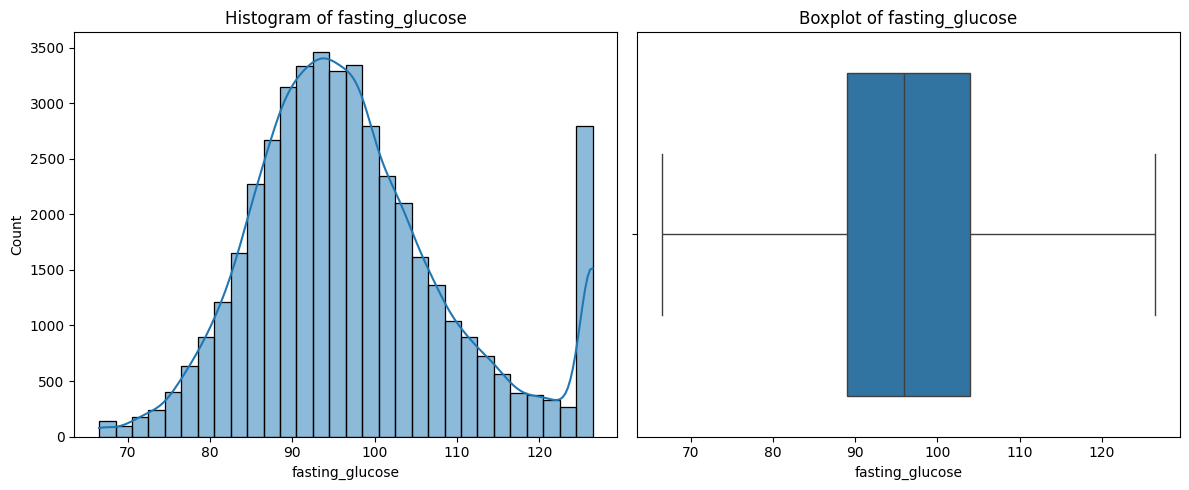

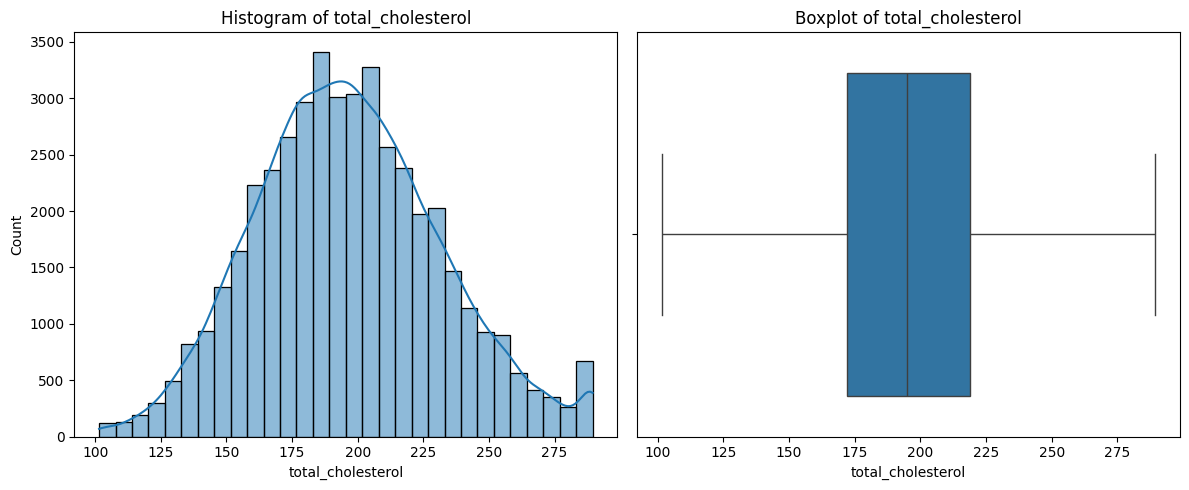

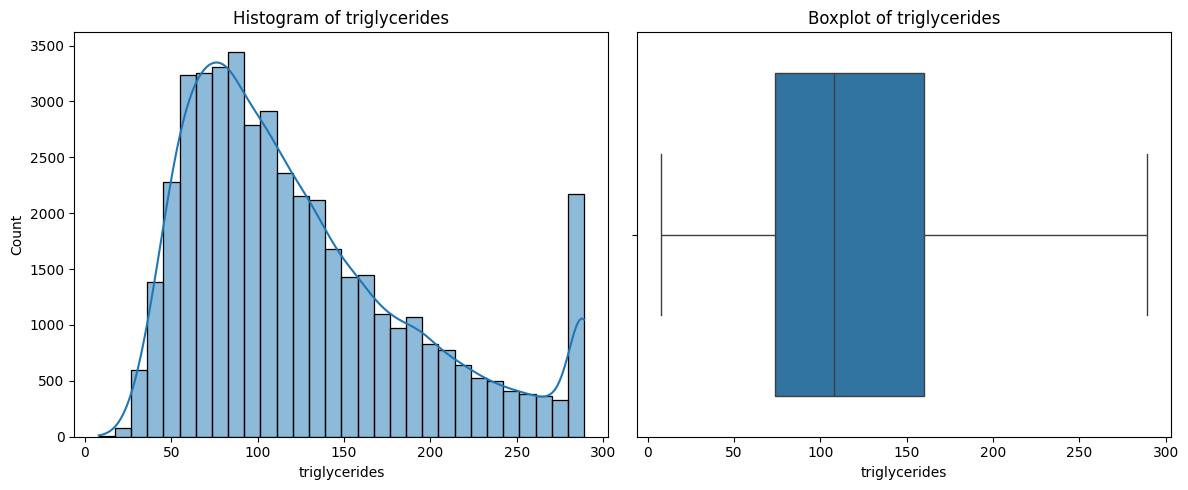

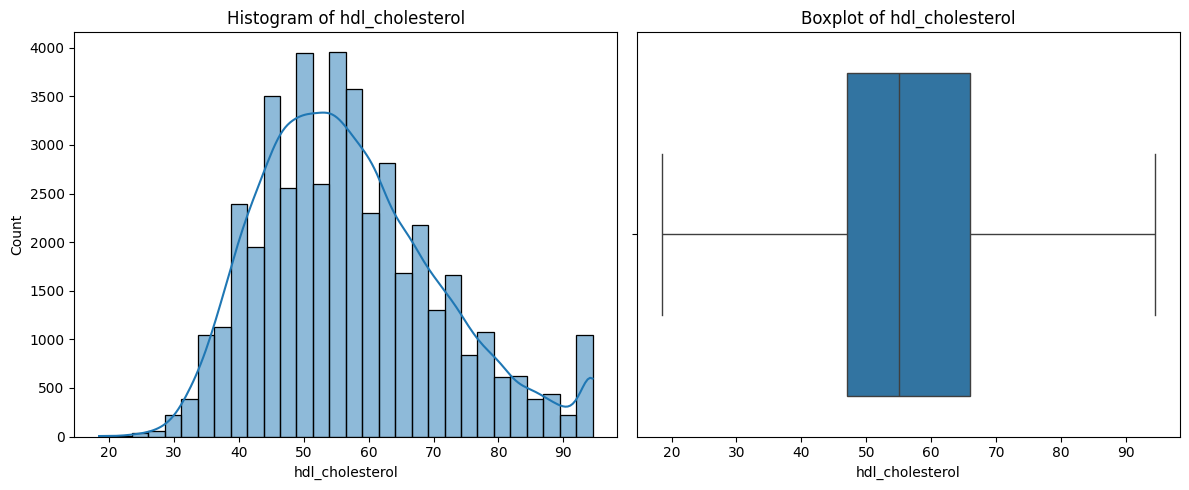

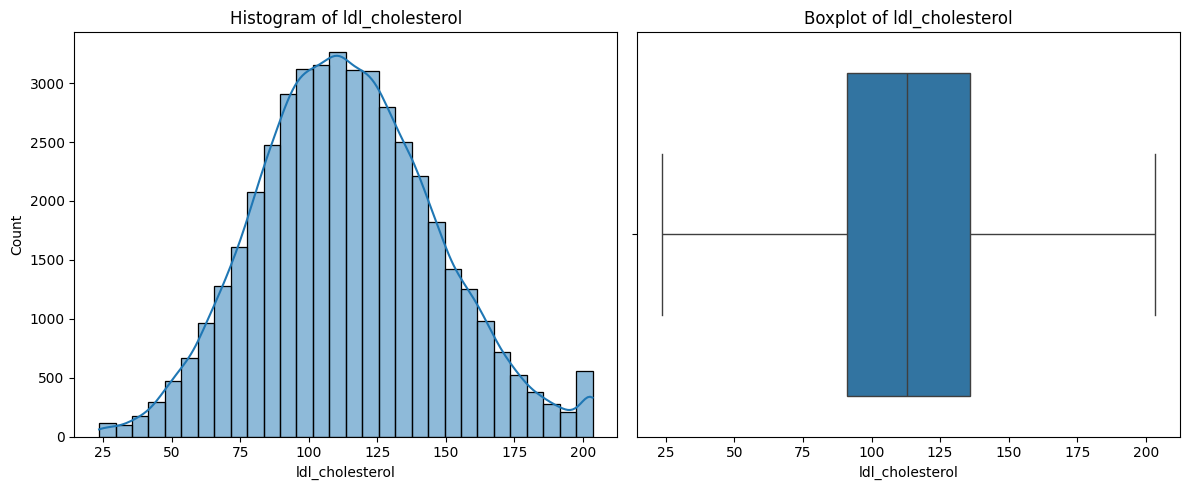

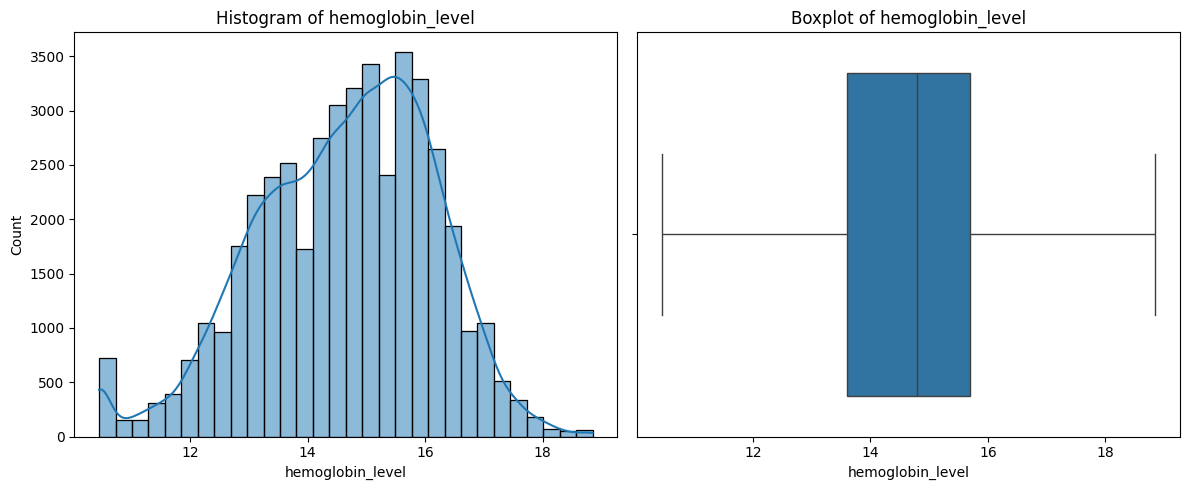

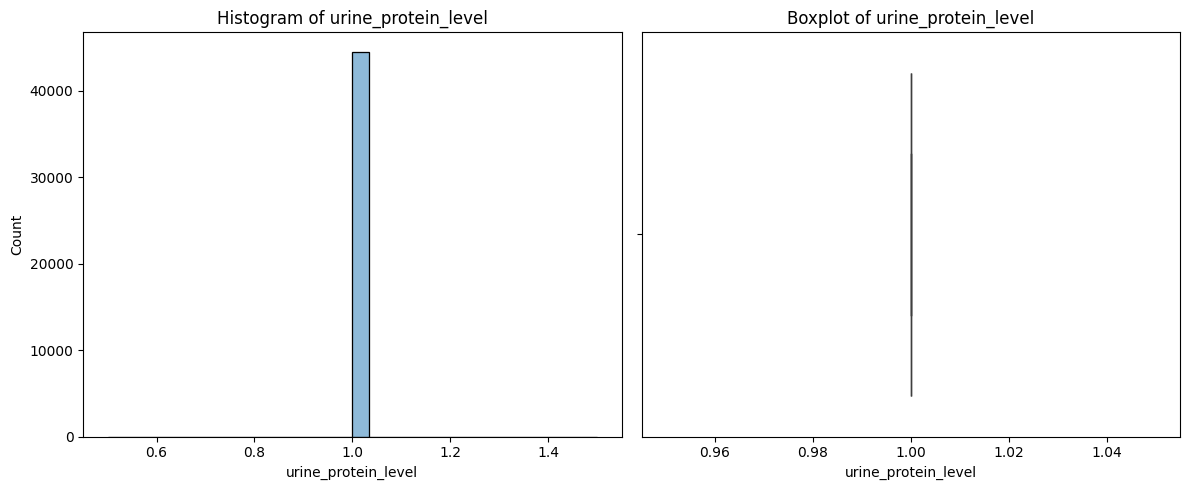

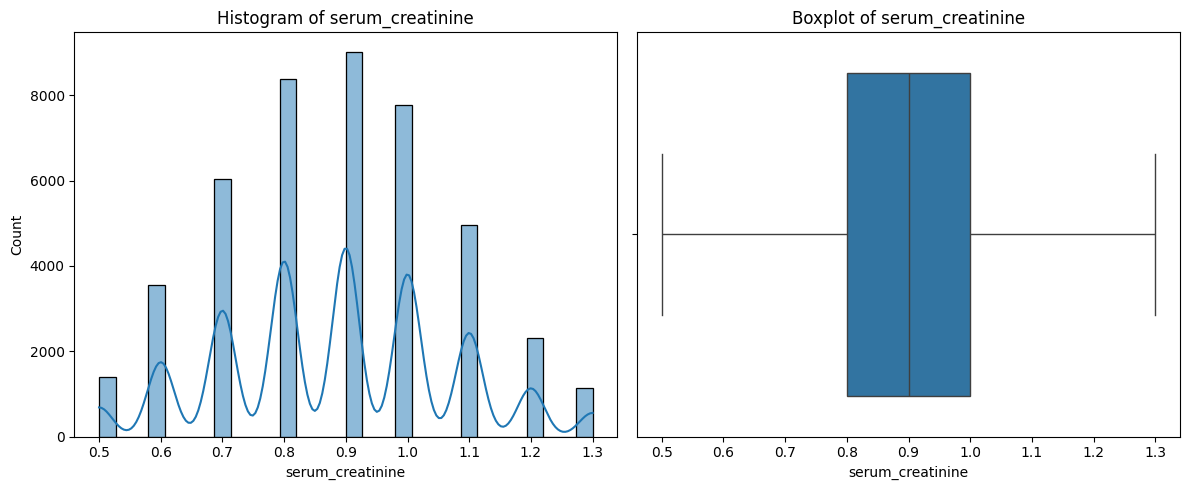

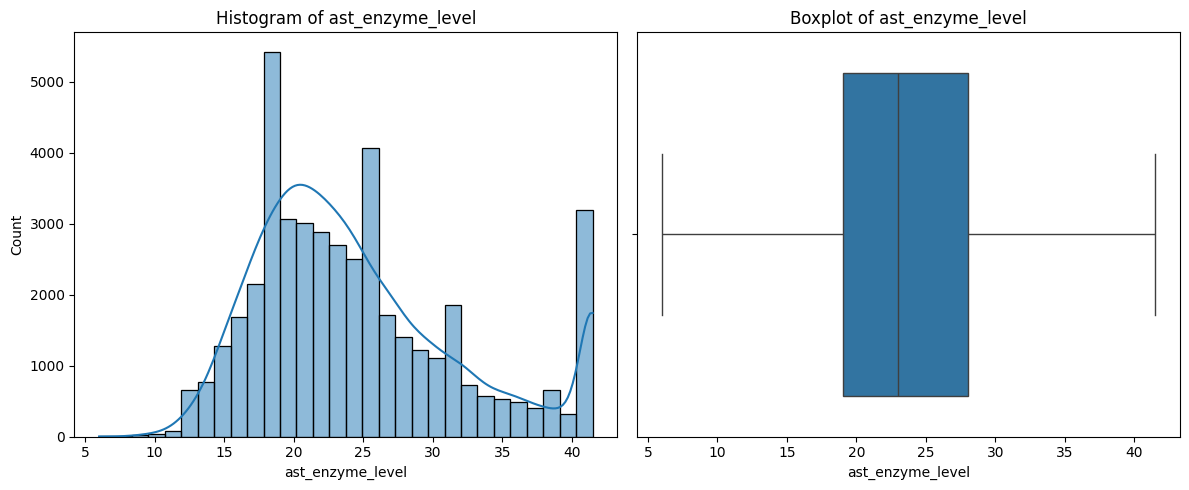

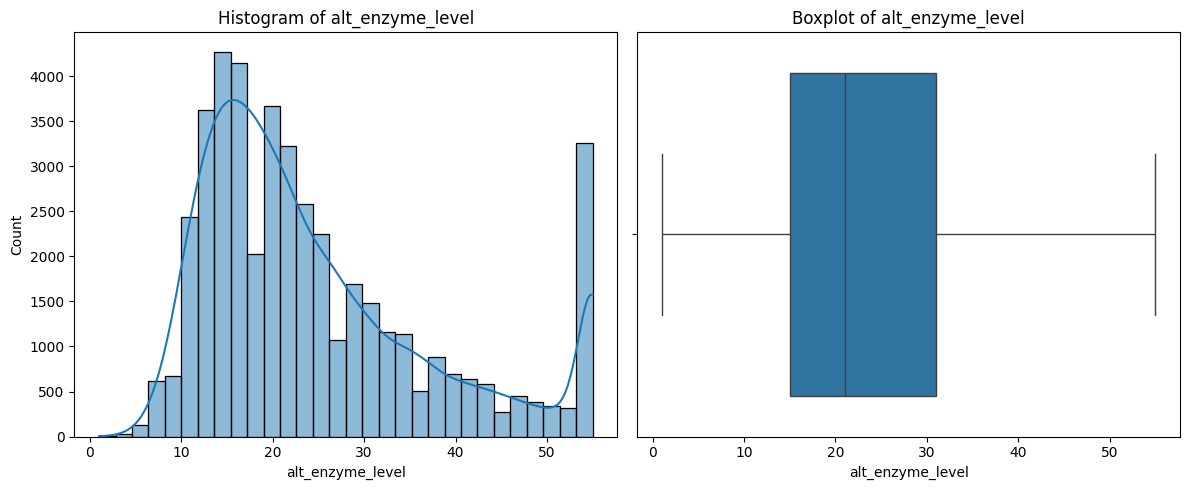

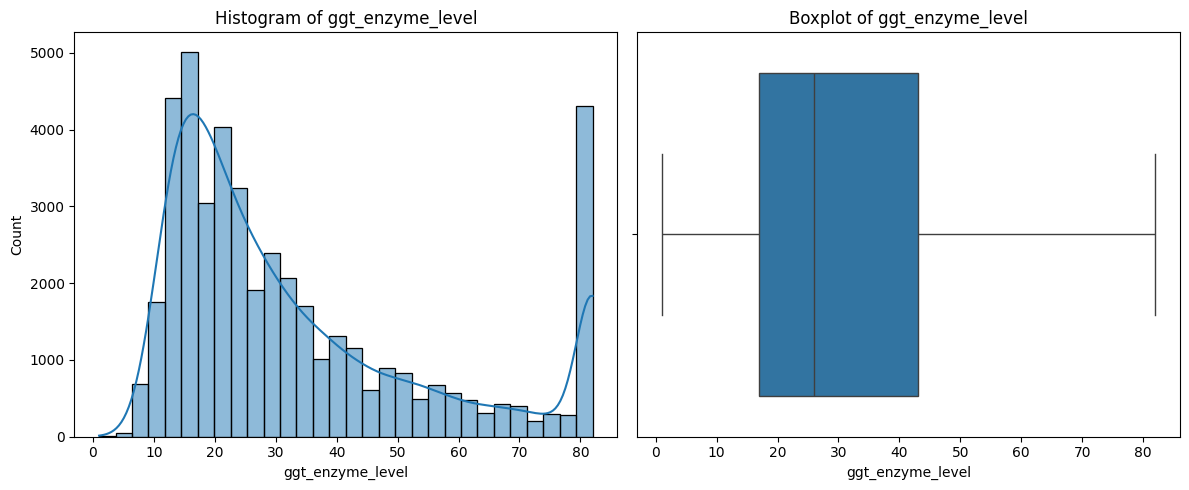

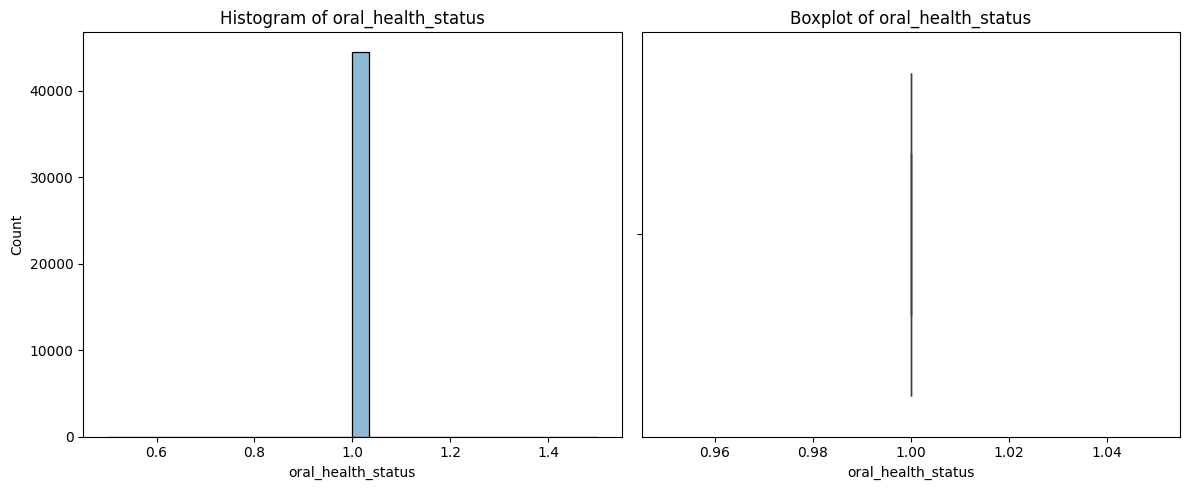

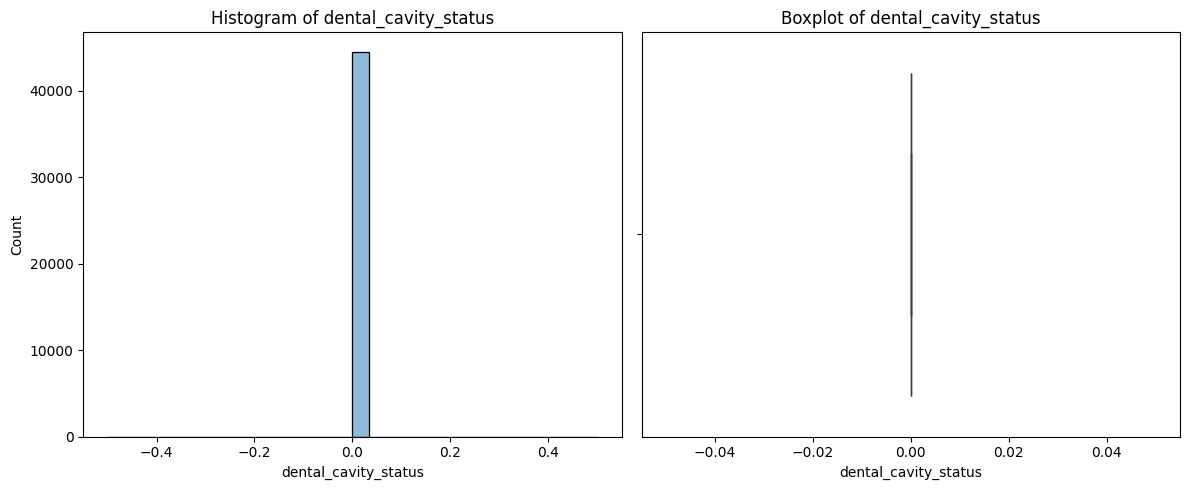

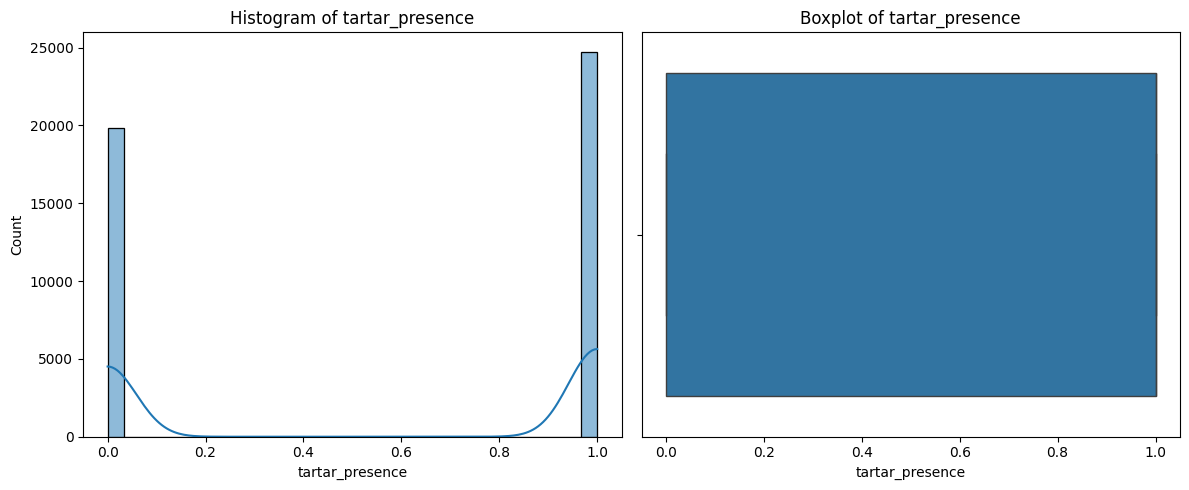

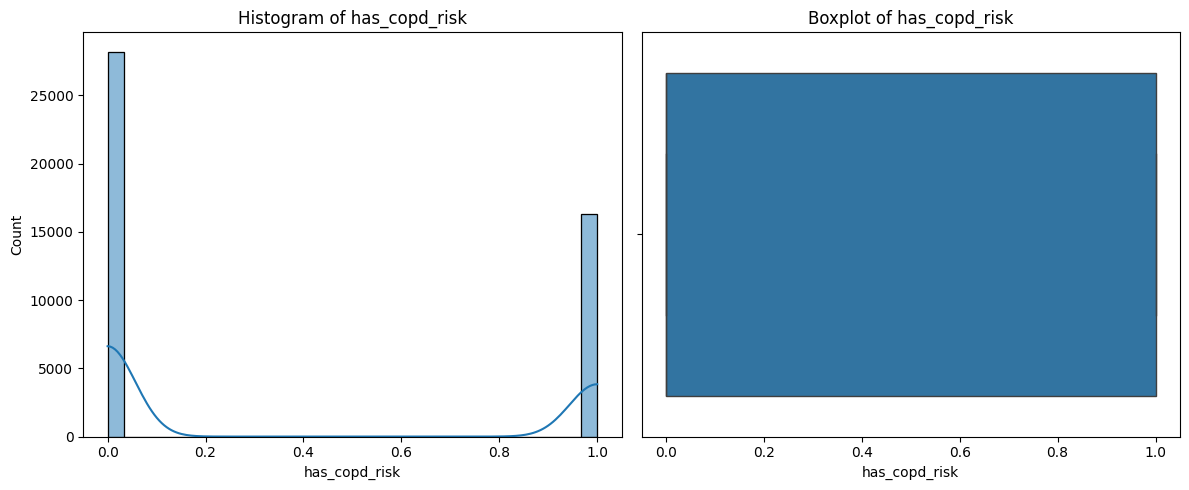

In [22]:
import seaborn as sns
numerical_features = train_df.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[feature])
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

Doing this helped a little especially for models like svm and logistic regression

In [23]:
X_train = train_df.drop(['patient_id','oral_health_status', 'has_copd_risk'], axis=1)
Y_train = train_df['has_copd_risk']
X_test = test_df.drop(['patient_id','oral_health_status'], axis=1)

# Function to test each model

input - model, X, true Y for corresponding X

output - predicted Y, F1 score



In [24]:
from sklearn.metrics import f1_score, mean_squared_error, r2_score

In [25]:
def evaluate_model(model, X, Y):

    # If the model supports predict_proba, use it
    if hasattr(model, "predict_proba"):
        pred_prob = model.predict_proba(X)[:, 1]
        # Convert probabilities → labels (threshold = 0.5)
        # pred_labels = (pred_prob >= 0.5).astype(int)

        thresholds = np.arange(0.0, 1.0, 0.01)

        best_f1 = 0
        best_thresh = 0.5

        for t in thresholds:
            preds = (pred_prob >= t).astype(int)
            score = f1_score(Y, preds)
            if score > best_f1:
                best_f1 = score
                best_thresh = t

        # final predictions with best threshold
        pred_labels = (pred_prob >= best_thresh).astype(int)
        print("Best Threshold:", best_thresh)

    else:
        # Fall back to normal predictions (0/1 labels)
        pred_labels = model.predict(X)
        pred_labels = np.array(pred_labels).ravel()

    # Compute F1
    f1 = f1_score(Y, pred_labels)


    return pred_labels, f1

In [26]:
from scipy.stats import mode
def clusters_to_labels(clusters, true_y):
    clusters = np.array(clusters)
    true_y = np.array(true_y)

    labels = np.zeros_like(clusters)

    for c in np.unique(clusters):
        idx = np.where(clusters == c)[0]
        majority = mode(true_y[idx], keepdims=True)[0]
        labels[idx] = majority

    return labels

## Dividing the training set into training and validation

In [27]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [28]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=0, stratify=Y_train
)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#Models

## Clustering

### K means

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
clusters_val = kmeans.fit(X_tr_scaled).predict(X_val_scaled)

pred_labels = clusters_to_labels(clusters_val, y_val)
f1_kmeans = f1_score(y_val, pred_labels)
print("KMeans F1:", f1_kmeans)


KMeans F1: 0.6724496877168633


###GMM

In [30]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_tr_scaled, y_tr)

pred_gmm, f1_gmm = evaluate_model(gmm, X_val_scaled, y_val)
print("GMM F1:", f1_gmm)

Best Threshold: 0.01
GMM F1: 0.6966016713091921


###Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=300)
logreg.fit(X_tr_scaled, y_tr)

pred_logreg, f1_logreg = evaluate_model(logreg, X_val_scaled, y_val)
print("Logistic Regression F1:", f1_logreg)

Best Threshold: 0.37
Logistic Regression F1: 0.708983194293314


###SVM

In [32]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=False, random_state=0)
svm_model.fit(X_tr_scaled, y_tr)

pred_svm, f1_svmmod = evaluate_model(svm_model, X_val_scaled, y_val)
print("SVM F1:", f1_svmmod)


SVM F1: 0.6975532068915593


In [33]:
from sklearn.calibration import CalibratedClassifierCV
svm = SVC(kernel='rbf', probability=False, random_state=0)
calibrated_svm = CalibratedClassifierCV(svm, cv=3)
calibrated_svm.fit(X_tr_scaled, y_tr)

pred_svm, f1_calsvm = evaluate_model(calibrated_svm, X_val_scaled, y_val)
print("SVM F1:", f1_calsvm)


Best Threshold: 0.26
SVM F1: 0.7168130329642357


#### Lin SVM

In [34]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(C=1.0, max_iter=5000, random_state=0)
linear_svm.fit(X_tr_scaled, y_tr)

pred_svm, f1_svm = evaluate_model(linear_svm, X_val_scaled, y_val)
print("LinearSVC F1:", f1_svm)

LinearSVC F1: 0.6807211398662402


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'loss': ['squared_hinge'],
}

grid = GridSearchCV(
    LinearSVC(max_iter=5000),
    params,
    scoring='f1',
    cv=3
)

grid.fit(X_tr_scaled, y_tr)
print("Best LinearSVC:", grid.best_params_)


best_svm = grid.best_estimator_
_, f1_val = evaluate_model(best_svm, X_val_scaled, y_val)
print("Validation F1:", f1_val)


Best LinearSVC: {'C': 0.01, 'loss': 'squared_hinge'}
Validation F1: 0.680331443523768


###Neural Networks

In [36]:
from sklearn.neural_network import MLPClassifier

nn1 = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=300,
    random_state=0
)

nn1.fit(X_tr_scaled, y_tr)
pred_nn1, f1_nn1 = evaluate_model(nn1, X_val_scaled, y_val)
print("Neural Network F1:", f1_nn1)

Best Threshold: 0.23
Neural Network F1: 0.7102339872370598


In [70]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='tanh',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=400,
    early_stopping=True,
    random_state=0
)

nn.fit(X_tr_scaled, y_tr)


MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(128, 64, 32), max_iter=400, random_state=0)

In [71]:
pred_nn, f1_nn = evaluate_model(nn, X_val_scaled, y_val)
print("Neural Network F1:", f1_nn)

Best Threshold: 0.33
Neural Network F1: 0.7142149578999505


#### Hyperparameter Tuning

In [55]:
param_grid = {
    "hidden_layer_sizes": [(64,32), (128,64), (128,64,32)],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate_init": [1e-3, 1e-2],
    "max_iter": [300, 400]
}
mlp = MLPClassifier(activation='tanh', solver='adam', random_state=0, early_stopping=True)

grid = RandomizedSearchCV(
    mlp,param_grid,
    scoring='f1',
    cv=3, n_iter=10, random_state=0, n_jobs=-1
)

grid.fit(X_tr_scaled, y_tr)




RandomizedSearchCV(cv=3,
                   estimator=MLPClassifier(activation='tanh',
                                           early_stopping=True,
                                           random_state=0),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(64, 32),
                                                               (128, 64),
                                                               (128, 64, 32)],
                                        'learning_rate_init': [0.001, 0.01],
                                        'max_iter': [300, 400]},
                   random_state=0, scoring='f1')

In [56]:
print("Best Neural Network Params:", grid.best_params_)

best_nn = grid.best_estimator_

pred_bestnn, f1_bestnn = evaluate_model(best_nn, X_val_scaled, y_val)

print("Validation F1:", f1_bestnn)

Best Neural Network Params: {'max_iter': 300, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (128, 64), 'alpha': 0.001}
Best Threshold: 0.37
Validation F1: 0.7139628327473632


In [44]:
# param_grid = {
#     'hidden_layer_sizes': [(64,),(128,64)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001, 0.001, 0.01],   # L2 regularization
#     'learning_rate_init': [0.001, 0.01]
# }
# mlp = MLPClassifier(max_iter=150,
#     early_stopping=True,
#     n_iter_no_change=10,)

# grid1 = GridSearchCV(
#     estimator=mlp,
#     param_grid=param_grid,
#     scoring='f1',
#     cv=3,
#     n_jobs=-1
# )

# grid1.fit(X_tr, y_tr)

# print("Best Neural Network Params:", grid1.best_params_)

# best_nn = grid1.best_estimator_

# pred_nn, f1_nn = evaluate_model(best_nn, X_val, y_val)

# print("Validation F1 (Neural Net):", f1_nn)


####PyTorch

In [45]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
class TorchBinaryMLPClassifier:
    def __init__(self, hidden_dim=64, hidden_layers=1, dropout=0.2,
                 lr=1e-3, batch_size=128, epochs=15):
        self.hidden_dim = hidden_dim
        self.hidden_layers = hidden_layers
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def _build_model(self, input_dim):
        layers = []
        in_dim = input_dim
        for _ in range(self.hidden_layers):
            layers += [nn.Linear(in_dim, self.hidden_dim), nn.ReLU(), nn.Dropout(self.dropout)]
            in_dim = self.hidden_dim
        layers += [nn.Linear(in_dim, 1)]
        return nn.Sequential(*layers)

    def fit(self, X, y):
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32).reshape(-1, 1)
        dataset = TensorDataset(torch.from_numpy(X), torch.from_numpy(y))
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        input_dim = X.shape[1]
        self.model = self._build_model(input_dim)
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.BCEWithLogitsLoss()

        for epoch in range(self.epochs):
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model(xb)
                loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=np.float32)
        with torch.no_grad():
            logits = self.model(torch.from_numpy(X))
            probs = torch.sigmoid(logits).numpy().reshape(-1)
        return (probs >= 0.5).astype(int)

    def predict_proba(self, X):
        X = np.asarray(X, dtype=np.float32)
        with torch.no_grad():
            logits = self.model(torch.from_numpy(X))
            probs = torch.sigmoid(logits).numpy().reshape(-1)
        return np.vstack([1 - probs, probs]).T

    def score(self, X, y):
        preds = self.predict(X)
        return (preds == y).mean()


In [46]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline



class TorchBinaryWrapper(BaseEstimator):
    def __init__(self, hidden_dim=64, hidden_layers=1, dropout=0.2,
                 lr=1e-3, batch_size=128, epochs=15):
        self.hidden_dim = hidden_dim
        self.hidden_layers = hidden_layers
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.clf = TorchBinaryMLPClassifier(hidden_dim, hidden_layers,
                                            dropout, lr, batch_size, epochs)

    def fit(self, X, y):
        self.clf.fit(X, y)
        return self

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

    def score(self, X, y):
        return self.clf.score(X, y)

torch_pipe = TorchBinaryWrapper()

torch_param_grid = {
    "hidden_dim": [64],
    "hidden_layers": [1],
    "dropout": [0.2],
    "lr": [1e-3],
    "epochs": [15]
}

torch_cv = GridSearchCV(
    torch_pipe,
    param_grid=torch_param_grid,
    cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42),
    scoring="f1",
    n_jobs=1
)

torch_cv.fit(X_tr_scaled, y_tr)
print("Best params:", torch_cv.best_params_)
best_torch = torch_cv.best_estimator_
pred_torch, f1_torch = evaluate_model(best_torch, X_val_scaled, y_val)
print("torch F1:", f1_torch)

Best params: {'dropout': 0.2, 'epochs': 15, 'hidden_dim': 64, 'hidden_layers': 1, 'lr': 0.001}
Best Threshold: 0.31
torch F1: 0.7120256928749852


### Bagging Neural Networks

In [47]:
from sklearn.ensemble import BaggingClassifier

base_mlp = MLPClassifier(
    hidden_layer_sizes=(64,32),
    max_iter=300
)

bagged_nn = BaggingClassifier(
    estimator=base_mlp,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1
)

bagged_nn.fit(X_tr_scaled, y_tr)


BaggingClassifier(estimator=MLPClassifier(hidden_layer_sizes=(64, 32),
                                          max_iter=300),
                  max_samples=0.8, n_jobs=-1)

In [57]:
pred_bnn, f1_bnn = evaluate_model(bagged_nn, X_val_scaled, y_val)
print("Bagging Neural Networks F1:", f1_bnn)

Best Threshold: 0.38
Bagging Neural Networks F1: 0.7209363492898474


#Model Comparision

In [72]:
results = [
    ("K means", f1_kmeans),
    ("GMM", f1_gmm),
    ("Logistic Regression", f1_logreg),
    ("SVM", f1_calsvm),
    ("Neural Networks", f1_nn),
]

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
model_names = [x[0] for x in results_sorted]

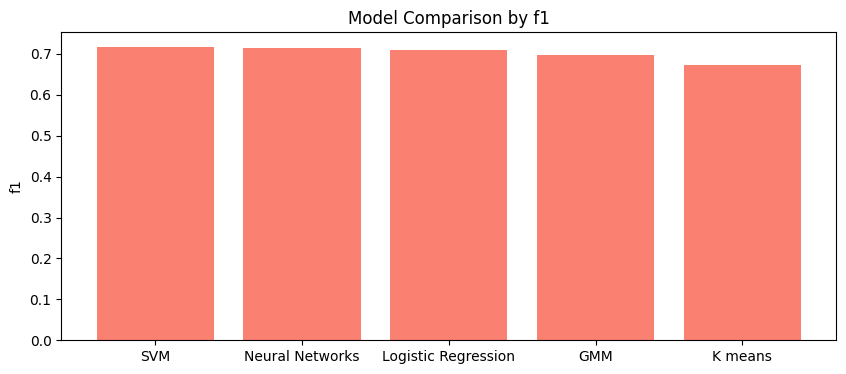

In [73]:
f1_scores = [x[1] for x in results_sorted]

plt.figure(figsize=(10,4))
plt.bar(model_names, f1_scores, color='salmon')
plt.ylabel('f1')
plt.title('Model Comparison by f1')
plt.show()

SVM and Neural Networks were very close in validation data, but Neural Networks did better in the unseen test data

# Submission Files Generation

This part is used to generate submission files in the required format, using the models trained earlier above

In [50]:
X_test_scaled

array([[ 1.31797586,  0.06288322, -0.50747899, ..., -1.03055926,
         0.        ,  0.89372162],
       [ 1.31797586,  0.89537781, -2.14921619, ..., -0.66484231,
         0.        , -1.11891665],
       [-0.75873924, -1.60210597,  0.58701248, ...,  2.21517865,
         0.        , -1.11891665],
       ...,
       [ 1.31797586, -0.35336408, -1.60197046, ..., -0.20769613,
         0.        , -1.11891665],
       [-0.75873924, -2.01835327,  1.13425822, ..., -0.84770078,
         0.        ,  0.89372162],
       [-0.75873924, -0.76961138,  1.68150396, ...,  0.1123062 ,
         0.        ,  0.89372162]])

In [51]:
# #X_t = poly.transform(X_test_scaled)
# preds = kmeans.predict(X_test_scaled)

In [74]:
pred_prob = nn.predict_proba(X_test_scaled)[:, 1]

preds = (pred_prob >= 0.33).astype(int)


In [75]:
submission = pd.DataFrame({
    "patient_id": test_df["patient_id"],
   "has_copd_risk": preds
})
submission

,patient_id,has_copd_risk
0,42427,0
1,27412,0
2,19283,1
3,45261,1
4,11155,1
...,...,...
11134,22277,0
11135,39007,1
11136,30710,0
11137,54339,1


In [76]:
submission.to_csv('submission_nn.csv', index=False)